### CSE 5243 - Introduction to Data Mining
## Homework 1: CRISP_DM Steps 1-3 (with Exploratory Data Analysis)
Replace the example information below with your real information:
- Semester: Spring 2023
- Instructor: Tom Bihari
- Section Wed/Fri 9:35AM
- Student Name: Jiyong Kwag
- Student Email: kwag.3@buckeyemail.osu.edu
- Student ID: 500165290

Based on CRISP-DM Template Version V11.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
- **(I will fill this in for each assignment - Tom Bihari)**
***

### Assignment Overview
In this assignment, you will analyze an ALTERED copy of the “Hotel Booking Demand” dataset.
- This dataset was pulled on 4/8/22 from: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
- The dataset file is named: **hotel_bookings_with_errors_V1.csv**

**The data has been altered slightly for use in course assignments,etc.:**
- A unique ROW attribute has been added.
- Errors have been added, such as: duplicated records, deleted records, deleted attribute values, erroneous attribute values.
**DO NOT PUBLISH THIS DATASET - it contains intentionally wrong data!**

This assignment covers the **first three of the six steps** of the **CRISP-DM process model** (Business Understanding, Data Understanding, Data Preparation). (See the CRISP-DM materials on CARMEN.)

The **objectives** of this assignment are:
- By analyzing and thinking critically about the data, you may identify interesting charcteristics that would be useful when using the data.
- The final, cleaned-up dataset that you create may be used to build classification / regression models in assignments.

### Problem Statement
Assume that you are the Director of Data Science for Buckeye Resorts, Inc. (BRI), an international hotel chain.  As is the case for all hotel chains, reservation cancellations cause significant impacts to BRI, in profitability, logistics, and other areas.  The cost to BRI of a cancelled reservation is $500 on average. 

- BRI wants to improve (decrease) the cancellation rates at its hotels, using more tailored interventions, based on newly available detailed data.  BRI processes 100,000 reservations per year, so an incremental improvement in cancellation rates would have a significant impact.

- One intervention being considered is to offer a special financial incentive to customers who have reservations, but who are “at risk” of cancellation.  BRI has performed a small pilot test, and has found that offering a $100 discount to a customer who is planning to cancel is effective 30% of the time in inducing the customer not to cancel (by locking in a “no cancellation” clause).

- BRI leadership has asked your team to analyze the new data, and determine if it is suitable for developing analyses and models that would be effective in predicting which future reservations are likely to be at risk of cancellation, so the aforementioned financial incentive could be offered.

- The head of BRI would then like you attend the upcoming BRI Board of Directors meeting.  She has asked you to present your findings to her and to the BOD, to help them decide whether to go forward with the planned tailored intervention approach, and/or to adjust or abandon the approach.  Your goal is to support the BOD in making a decision. 

You decide to look at the dataset, **explore (understand)** what it contains, and **create (prepare)** a clean dataset from it that contains the kind of information you think might be useful.

You do not yet know the specific algorithm, formula or model you will use to predict cancallations.  **That will come in a later step.**

### Things To Do
Complete the sections for the first three steps of CRISP-DM in this notebook.  Some intial guidance / sugggestions:
- **Business Understanding**: Fill in the cells, using your thoughts on the specific item.  Your answers will not be graded for "correctness", just "thoughtfulness".  Feel free to "invent" a narrative for detailed information not provided above.  Don't spend a lot of time on it.
- **Data Understanding**: There are many attributes in this dataset. Once you have done some initial analysis, you may choose to concentrate on ones that seem more promising or useful.  However, you must give evidence and explain why the attributes that you choose to give less attention warrant the lack of attention. 
- **Data Preparation**: Clean up the data and save it for future use.

It is essential that you **communicate** your goals, thought process, actions, results, and conclusions to the **audience** that will consume this work.  It is **not enough** to show just the code.  It is not appropriate to show long sections of **unexplained printout**, etc.  Be kind to your readers and provide value to them!

**ALWAYS follow this pattern** when doing **each portion** of the work.  This allows us to give feedback and assign scores, and to give partial credit.  Make it easy for the reader to understand your work.
- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code).
- Show or describe the **result** clearly (and briefly as needed), and explain the significant **conclusions or insights** derived from the results. 

Based on CRISP-DM Template Version V11.

**HAVE FUN!**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

***
# Section: 1 - Business Understanding
- This step is essential (and occasionally ignored…).  It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.

- Consider the following questions and discuss the possible answers to them in the spaces below.
  - It is OK to say that you do not know.  How might you get answers to the questions?
  - You may consider some of the questions to be "not applicable".  If so, why?
  - You may choose to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.
***

**Context**
- What is the overview, history, big picture?

Buckeye Resorts, Inc. (BRI) is an international hotel chain. As business purpose, they want to reduce cancellation of reseravation.

As the Director of Data Science for Buckeye Resorts, Inc. (BRI), I am expected to use the reservation data to find the elemetns that impacts the cancellation of the customer. Then, using that elements to see how to reduce the cancellation.

**Business Objectives**
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

Using the meta data provided, I am going to look for the common elements that impact customer who are cancelling the reservation often. Then, the element will help to narrow down next actions that BRI can take to reduce the cancellation.

In the problem business value is provided in the overview, it gives example of how to reduce the cancellation, providing the 100 dollar discount to make no cancellation clause. It successfully reduced the cancellation by 30 percent. For further assumption, providing the free breakfast, specail day celebration (like customer's birthday), or free daily sport (yoga, golf, or tennis) lesson will make future customer and current customer to make good expereince of using the hotel. As a result, it will significantly reduce the cancellation. 

**Stakeholders**
- Who are they?
- What are their needs?

Stackholder of the problem is the board of director of BRI. As business is getting bigger, more people is reserving the room. However, increase in reservation also increase the cancellation. Some of cancellations are no-show which cause business to loss money. Thus, to efficiently use the budget, they want to find the elements that may impact the cancellation.

**General Goals**
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions?  What are they?
- Support decisions?  What are they?

The general goal of the problem is reduce the cancellation. As business is getting bigger, BRI find out that cancellations is also increasing. Cancellation also include the no show. If the situation continues, BRI might lose future customer. For example, because of no show, BRI might not be able to process future customer to reserve the room they wanted. Moreover, if customers keep canceling the reservation, they is problem in the hotel. It means it lower the satisfactory of the customer. Thus, it is important to find why customers cancels the reservation. 

Therefore, discount, increasing the services is expected to decrease the cancellation based on the internet research. However, further study of data will help to see more broad sight of issue.

**Scope**
- What is the specific scope of the project?
- What, specifically, is NOT in scope?  (What are you not doing that someone might think you are doing?)
Is the scope flexible?  In what way?

Scope of project would be using the resources to reduce the cancellation of the reservation for whole hotels belong to the BRI. Reducing the scope of the project would reduce the potential of increasing level of difficulty of handling cancellation.

**Deliverables**
- Report?
- Reusable code?
- Presentation?

As a result, there will be several attributes that affect the cancellation. For example, type of customers who most often make cancellation. Thus, using the code with the equation and result data to make report and presenation will be helpful step for other people to understand why the attribute is causing the problem

**Success Criteria**
- What, specifically, must be accomplished for this project to be a success?

At first, knowing the how each attribute is working. Then, using the data to find customer in common. Then, cooperation of employee would be helpful. Because only with data, there must be something that we cannot see which employees who work at hotel know better. Lastly, reducing cancellation migh need money. budge help from the board of director is important. 

**Solution Approach**
- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?

The solution could be both. Continuesly having promotion and providing more service will affect the budget of the company. However, by having events, customer will have better experience about the hotel more. As a result, it expected to reduce cancellation. 

Furthermore, those events could be performed seasonally or annually to attract more customers. 

**Quality**
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

It depends on how much cancellation is causing the problem. On the overview, it said that a cancellation causes 500 dollars. However, this is not enough information to handle the level of criticality. 

At first cancellation could be not serious (not life-critical). however, the problem is something the the company must acknowledge and tried to find the solution. Thus, the company must do careful attention on cancellation rate for periodically.

**Constraints**
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

As we are looking through the information about customer, it might cause some privacy issue. In the meta data, there are no specific personal information about customers. However, to process events (special day celebration), we need to know some level of information about customer.
In the architectural contraints, not all hotels can provide special events, like yoga, gold or tennis based on the infrastructure that each hotels have. 

**Time / Cost**
- What is the deadline or budget?

Deadline and budge is not decided yet. However, after analysis and the presentation with the board of the director, level of difficulty to solve the issue will decide the deadline and budget. 

In my assumption, reducing the cancellation is life-long issue for hotel. Thus, I assume there might be no specific deadline. 

**Dependencies**
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

Find the the solution of cancellation is the most top part of the project. I will make a number of dependent projects: discount, promotion, or life activity for customers.

**Resources Needed**
- Do you potentially need access to specific people, data, etc?

To solve the problem, not only the data is needed but also employyes who actually works at the hotel are needed. There experience about hotel will help to understand why cancellation is causing the problem. Moreover, when employees are entering the PMS the infomration, there will be mistake or some other operation I need to know to handle the data differences discussed below.

**Other Considerations**
- What other considerations, not covered above, might be relevant?

There is no more consideration.

***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.).  The deeper Data Understanding analysis then is done on the "cleaned" data.  This mitigates the issue of bad data skewing the data analysis results.  **For this example, we will not do this separate first pass.**
***

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.

Identify the type of data for each attribute.
  - Categorical: Nominal, Ordinal
  - Numerical: Interval, Ratio
  - Other: Complex or unstructured data (e.g., text strings, images,...)
  
NOTES:
  - This determines what operations are "meaningful" for each attribute.  For example, you can't add two Ordinal attributes.
  - You can't always tell the attribute types from the data itself.  For example, an Integer attribute could be Ordinal or Interval.

Identify interesting characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Is this dataset relevant and appropriate for the goals of this project?
    - If not, what could you do? (find other data to replace or supplement this dataset, etc.)
***

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**

**Discussion:**

  |Num|Name                            |Data Type|       Type|       Meaning|
 | :--- | :------ |                         :------------- |:-----     | :---------- |
 |0  | row  |                           Integer   |      Ordinal  |  Counting the number of records
 |1  | hotel                        |   String      |    Nominal   | Name of the hotel
 |2   |is_canceled                  |   Float       |    Nominal   | If booking is canceled (1) or not canceled (0)  
 |3  | lead_time                     |  Integer     |    Ratio  | Number of days between entering into PMS to customser arrival
 |4   |arrival_date_year             |  Integer     |    Nominal*|  Customer arrival year
 |5   |arrival_date_month            |  String      |    Nominal*|  Customer arrival month
 |6  | arrival_date_week_number      |  Integer     |    Nominal* | Customer arrival week number
 |7  | arrival_date_day_of_month     |  Integer     |    Nominal*| Customer arrival day of month
 |8   |stays_in_weekend_nights       |  Integer     |    Ratio  | Number of weekend nights customer stayed
 |9  | stays_in_week_nights          |  Integer     |    Ratio  | Number of week day nights customer stayed
 |10 | adults                        |  Integer     |    Ratio   | Number of adults
 |11  |children                      |  Integer     |    Ratio| Number of childre
 |12  |babies                        |  Integer     |    Ratio |   Number of babies
 |13  |meal                          |  String      |    Nominal | Meal Type
 |14  |country                       |  String      |    Nominal | Customer country
 |15  |market_segment                |  String      |    Nominal | Market Segment: Travel Agency (TA) or Tour Operator (TO)
 |16  |distribution_channel          |  String      |  Nominal | Booking distribution:  Travel Agency (TA) or Tour Operator(TO)
 |17 | is_repeated_guest             |  Integer     |    Ordinal  | if customer is repeate guest (1) else (0)
 |18  |previous_cancellations        |  Integer     |    Ratio| Number of previous cancellation of customer
 |19  |previous_bookings_not_canceled|  Intger      |    Ratio |  Number of booking not canceled by customer
 |20  |reserved_room_type            |  String       |   Nominal|  Reserved room
 |21  |assigned_room_type            |  String      |    Nominal | Actual room assigned to customer. 
 |22  |booking_changes               |  Intger      |    Ratio  | Number of change by customer after entering into PMS
 |23  |deposit_type                  |  String    |    Nominal | Deposite type of customer: No deposite, non refund, refundable
 |24  |agent                         |  Float       |    Nominal| ID of travel agency 
 |25  |company                       |  Float       |    Nominal| ID of company books the room
 |26  |days_in_waiting_list           | Integer      |   Ratio| Days between waiting list and booking confirmation
 |27  |customer_type                 |  String      |    Nominal | type of booking:  Contract, Group, Transient, Transient-party
 |28 |adr                  |  Integer     |    Ratio |  average daily rate: sum of lodging transaction divided by staying night
 |29  |required_car_parking_spaces   |  Integer     |    Ratio |   Number of parking space needed 
 |30  |total_of_special_requests     |  Integer     |    Ratio| Number of special request
 |31  |reservation_status             | String      |    Nominal| reservation status: canceled, no show, check out
 |32  |reservation_status_date        | String      |    Nominal*| date that made reservation status

### **Load the Dataset.**

In [130]:
#OPTIONAL: Load it only once per session, and save it, so we don't waste time
try:
    _ = data_from_source_file_df
    print("Reusing source data")
except:
    print("Loading source data")
    data_from_source_file_df = pd.read_csv("hotel_bookings_with_errors_V1.csv")
data_df = data_from_source_file_df

Reusing source data


In [131]:
# Print the schema, based on the data in the file.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ROW                             119391 non-null  int64  
 1   hotel                           119391 non-null  object 
 2   is_canceled                     119390 non-null  float64
 3   lead_time                       119391 non-null  int64  
 4   arrival_date_year               119391 non-null  int64  
 5   arrival_date_month              119391 non-null  object 
 6   arrival_date_week_number        119391 non-null  int64  
 7   arrival_date_day_of_month       119391 non-null  int64  
 8   stays_in_weekend_nights         119391 non-null  int64  
 9   stays_in_week_nights            119391 non-null  int64  
 10  adults                          119391 non-null  int64  
 11  children                        119387 non-null  float64
 12  babies          

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

### **Categorizing the Attributes

In [132]:
# Create some simple lists for future use
all_attribute_names = list(data_df)
print(all_attribute_names)
class_attribute_name = 'is_canceled'
nominal_attribute_names = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status','arrival_date_month','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month']
ordinal_attribute_names = ['is_canceled', 'is_repeated_guest'] #['row_id', 'zone']  # row_id may not be needed
categorical_attribute_names = nominal_attribute_names + ordinal_attribute_names
interval_attribute_names = [] #'reservation_status_date'
ratio_attribute_names = ['lead_time', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list','adr', 'required_car_parking_spaces','total_of_special_requests','stays_in_weekend_nights','stays_in_week_nights']
numerical_attribute_names = interval_attribute_names + ratio_attribute_names



['ROW', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


**Discussion**

Based on the attribute of the meta data, I classified the each of the attributes into the four categories: **nominal, ordinal, interval,** and **numberical.**

This is important because classifing the attribute helps to identify the relationship among own category and between categories.

Furthremore, I put **nominal and ordinal** into c**ategorical attribute** and **interval and ratio** into **numerical attribute.**

Categorical attributes normaly compare and find the differences among the values of attribute and numerical attribute can make calculation attributes

**Discussion**

Special note is that **arrival date** attributes are set onto the nominal attribute. It is easy to think that calendar date is interval attribute. However, as individual attributes, those attributes are not interval. Instead, by putting the attributes into nominal, we can see the number of customers visited by each year, month, day, and weeks. 

**arrivate date** attributes can be interval if they are combined into one attribute value. However, in this scenario of finding the attributes that affect the cancellation, it seems to be unnecessary to make new column.

**reservaiton status date** is obvious interval attribute. It is unusful to put them into nominal to see exact date of number of customers who are making reservation status. Moreover, this attribute is string data type which interrupt the numerical attribute calculation in furthre discussion. Thus, it is left out from interval attribute.






### **Basic Statistic

In [5]:
data_df.describe() #calculates statistics for all numerical columns

ROW    is_canceled      lead_time  arrival_date_year  \
count  119391.000000  119390.000000  119391.000000      119391.000000   
mean    59694.000050       0.370408     104.010662        2016.156544   
std     34465.357245       0.482916     106.862967           0.707481   
min         0.000000       0.000000       0.000000        2015.000000   
25%     29846.500000       0.000000      18.000000        2016.000000   
50%     59694.000000       0.000000      69.000000        2016.000000   
75%     89541.500000       1.000000     160.000000        2017.000000   
max    119389.000000       1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119391.000000              119391.000000   
mean                  27.165172                  15.798117   
std                   13.605081                   8.780897   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119391.000000         119391.000000  119391.000000   
mean                  0.927591              2.500297       1.856572   
std                   0.998613              1.908278       0.582185   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119387.000000  119391.000000      119391.000000   
mean        0.103889       0.007949           0.031912   
std         0.398560       0.097436           0.175766   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119391.000000                   119391.000000   
mean                 0.087117                        0.137096   
std                  0.844333                        1.497431   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes         agent      company  days_in_waiting_list  \
count    119391.000000  103051.00000  6797.000000         119391.000000   
mean          0.221122      86.69487   189.266735              2.321130   
std           0.652303     110.77504   131.655015             17.594648   
min           0.000000       1.00000     6.000000              0.000000   
25%           0.000000       9.00000    62.000000              0.000000   
50%           0.000000      14.00000   179.000000              0.000000   
75%           0.000000     229.00000   270.000000              0.000000   
max          21.000000     535.00000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119391.000000                119391.000000              119391.000000  
mean      101.831089                     0.062517                   0.571366  
std        50.535580                     0.245290                   0.792796  
min        -6.380000                     0.000000          

**Discussion:**

Calculating the qunatile statistic between values of each attributes is important because we can verify the total number of each attribute to find null value. Also, we can briefly see the data flow of each attribute such as minimum, maximum, average to check the verfication of the data

**Discussion:**

The **is_canceled** count is different from other count. It will be handled below.

The Maximum **lead_time** seems to be too big. It is time between entering PMS to arrival time. We know the arrival time, however there is no attribute call PMS entering date. Thus, there seems to be no way to validate the number.

The adult, previous_booking_not_changed, booking_changes seems to have to big numbers, which can be outlier. These number could be a data the is mistakenly putted. To validate data, we need more information. 

The negative **adr(average daily rate)** is clearly wrong. It can be calculated by sum of lodging transaction divided by total number of staying night

The maximum **adr** has too big number compare to other numbers. It can be calculated by sum of lodging transaction divided by total number of staying night

For both negative **adr** and maximum **adr**, equation for calcuating values is given. However, we need more information about loding transaction for each customer is needed to validate ADR. Thus, no furthre reaction cannot be made.


***
## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

In [12]:
print("Total Records:", data_df.shape[0], "- Value Counts per Categorical Attribute:\n")
for att in categorical_attribute_names:
    print(data_df[att].value_counts(normalize = False, sort = True, ascending = False, bins = None, dropna = False))
    print("\n")

Total Records: 119391 - Value Counts per Categorical Attribute:

City Hotel      79330
Resort Hotel    40061
Name: hotel, dtype: int64


BB           92311
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


PRT    48590
GBR    12130
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64


Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Onlin TA             1
Name: market_segment, dtype: int64


TA/TO        97871
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64


A    85995
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64


A    74054
D    25322


**Discussion**

In the code, I tried to find the number of each values for each of the **categorical attributes** that I categorized above.
This is important step to do because it narrows down how data is set in the meta data.
Thus, we can easily see the errors of typo or unnecessary data more easily by comparing number.

**Discussion:**

In the **market_segment** "Onlin TA" is typo. It coulde be change to "Online TA"
In the **is_canceled**, NaN is wrong. It will be discussed below

In the **market_segment** and **distribution channel**, it has two undefined value. If both agent and company columns for the row have NULL, it is possible that the value is direct. Or If agent has value, it is possible that it is TA value. Or If company has value, it is possible that it is corporate. However, it is only assumption. Based on metadata, this assumption is not always correct. So, it is not possible to replace it with appropriate values

We can delete rows that have undefined **market_segment** and **distribution channel**. However, we still can use other columns to make conclusion about reservation cancellation. So, I will leave the rows as it is.

In the **reserved room** and **assigned room type**, only assigned room type column has the "K" and "I" type of room. Based on the explanation of column, hotel assign different room to customer based on the hotel operation reason. So, K and I type might be room that assigned to the customer who reserved overbooked room or makes special request etc.. Thus, I believe there is no further action is needed for this column.

Na value for **agent** and **company** will be discussed at the below.

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

### **Missing Attribute Data**

In [7]:
# Count the missing values for the entire dataframe.
na_df = data_df[data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()

print("Total Records:", data_df.shape[0], "- Number of Records with NA:", num_records_with_na, "- Number of NA Values:", num_na_values)
na_df.head(10)

# Show the missing values for each attribute.
print("NA Values per Attribute:")
for att in all_attribute_names:
    num_na = na_df[att].isna().sum()
    if num_na > 0:
        print(att,na_df[att].isna().sum())

Total Records: 119391 - Number of Records with NA: 119174 - Number of NA Values: 129427
NA Values per Attribute:
is_canceled 1
children 4
country 488
agent 16340
company 112594


**Discussion**

In the code, we are trying to find how many NA values are existed for the each of the attribute. NA value could be found through step above. However, by adding this step with the code, we can re-verify and find further information that we might missed from previous steop.

**Discussion:**

The **is_canceled** value is NA. It can be filled with reservation_status. This value is important to replace because we have to find specific customer who are making the reservation cancellation.
    
The **children** has four NA. We cannot sure which value this can be filled. It might be caused because different people are putting the same information. For exmaple, some people put zero into the value while some people enter the NA if there is no children. Thus, to correctly fill in this attribute, gaining more information from employee would be wise choice.

The **country** has NA value. We cannot sure which value this can be filled.

For **children** and **country**, it is dangerous to replace the value into the columns because we cannot assume anything using other column. It might be good idea to use mean, yet it is also dangerous becuase these attribute might affect some other attribute like **adr**. 

Also, we can delete the row that has NA value for **children** and **country**, yet we still can use other column information from those rows. So, I will leave those rows as NA.

The **agent**, **company** have number of NA values. This value can be NA because customer directly made booking, then these values must be NA. However, like **market_segment**, this assumption is not alway true and with same reason, I will leave this rows as it is.





### **Duplicate Records**

**Exclude ROW attribute**

In [17]:
# Find duplicate records across all attributes.
dup_df = data_df[data_df.duplicated(subset=data_df.columns.difference(['ROW']))]
num_dup_records = dup_df.shape[0]

print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(100)

Number of duplicate records across all attributes: 31995


ROW         hotel  is_canceled  lead_time  arrival_date_year  \
5        5  Resort Hotel          0.0         14               2015   
6        5  Resort Hotel          0.0         14               2015   
23      22  Resort Hotel          0.0         72               2015   
44      43  Resort Hotel          0.0         70               2015   
139    138  Resort Hotel          1.0          5               2015   
...    ...           ...          ...        ...                ...   
1844  1843  Resort Hotel          0.0        110               2015   
1848  1847  Resort Hotel          0.0        110               2015   
1890  1889  Resort Hotel          0.0         87               2015   
1899  1898  Resort Hotel          1.0        158               2015   
1909  1908  Resort Hotel          1.0        185               2015   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
5                  July                        27                          1   
6                  July                        27                          1   
23                 July                        27                          1   
44                 July                        27                          2   
139                July                        28                          5   
...                 ...                       ...                        ...   
1844          September                        38                         17   
1848          September                        38                         17   
1890          September                        38                         19   
1899          September                        39                         20   
1909          September                        39                         21   

      stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
5                           0                     2       2       0.0       0   
6                           0                     2       2       0.0       0   
23                          2                     4       2       0.0       0   
44                          2                     3       2       0.0       0   
139                         1                     0       2       0.0       0   
...                       ...                   ...     ...       ...     ...   
1844                        1                     3       1       0.0       0   
1848                        1                     3       1       0.0       0   
1890                        4                     6       2       0.0       0   
1899                        2                     5       2       0.0       0   
1909                        1                     1       2       0.0       0   

     meal country market_segment distribution_channel  is_repeated_guest  \
5      BB     GBR      Online TA                TA/TO                  0   
6      BB     GBR      Online TA                TA/TO                  0   
23     BB     PRT         Direct               Direct                  0   
44     HB     ROU         Direct               Direct                  0   
139    BB     PRT      Online TA                TA/TO                  0   
...   ...     ...            ...                  ...                ...   
1844   BB     NLD         Direct               Direct                  0   
1848   BB     NLD         Direct               Direct                  0   
1890   BB     IRL  Offline TA/TO                TA/TO                  0   
1899   BB     PRT      Online TA                TA/TO                  0   
1909   HB     PRT         Groups                TA/TO                  0   

      previous_cancellations  previous_bookings_not_canceled  \
5                          0                               0   
6                          0                               0   
23                         0                               0   
44                         0                       

**Include ROW attribute**

In [9]:
dup_df = data_df[data_df.duplicated()]
num_dup_records = dup_df.shape[0]

print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

Number of duplicate records across all attributes: 1


ROW         hotel  is_canceled  lead_time  arrival_date_year  \
6    5  Resort Hotel          0.0         14               2015   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
6               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
6                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
6   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
6                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
6                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
6                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
6                          1          Check-Out                7/3/2015

**Discussion**

Duplicate records are most commly made by mistake when one is entering the data or some other reason. This is important step becuase duplicate records may disrrupt the analyze the data by creating the wrong output when creating the graph or result.

Thus, while studying the meta data, I figured out that we can assume two ways of identifying the duplicate records.

1. Excluding the **ROW attribute** from the duplicate. ROW number is essential attribute to consider for finding the cancellation cause. Also, from meta data, we can see the there are couples of duplicate values with only different ROW number. 
2. Including the **ROW** attribute into the duplicate. This way we can see the mistake that is caused when entering the meta data. 


First method has **31995** numbers of duplicate and we have total of **119391** of records. This is about **27 percent** of the data which is too many numbers of mistakes. If all these data are mistakenly putted into system, there is something wrong in the system or whole database is untrustworthy. However, we are not going to assume this way for homework purpose. 

Moreover, if these duplicate values are entered for certain reason, further information is needed to handle duplicate values to use first method.

Second method only has one duplicate. Thus, I am going use the second method of clearing the duplicate value. We could assume that eventhough records are same, they are different customer with having same information or people who came together put entered into separate rows. 

As a result, only **ROW 5** is duplicate record in the data.

In [9]:
# Find duplicate records across one or more specific attributes.
# This is useful for finding duplicate records that have the same "unique identifier", which should never happen.
dup_df = data_df[data_df.duplicated(['ROW',])]
num_dup_records = dup_df.shape[0]

list_of_duplicates = dup_df['ROW'].unique()
list_of_duplicates.sort()
#print(list_of_duplicates)
complete_dup_df = data_df.loc[data_df['ROW'].isin(list_of_duplicates)]

print("Number of duplicate record (multiples) for the *row_id* attribute:", num_dup_records)
complete_dup_df.head(10)

Number of duplicate record (multiples) for the *row_id* attribute: 1


ROW         hotel  is_canceled  lead_time  arrival_date_year  \
5    5  Resort Hotel          0.0         14               2015   
6    5  Resort Hotel          0.0         14               2015   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
5               July                        27                          1   
6               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
5                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
5   BB     GBR      Online TA                TA/TO                  0   
6   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
5                       0                               0                  A   
6                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
5                  A                0   No Deposit  240.0      NaN   
6                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
5                     0     Transient  98.0                            0   
6                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
5                          1          Check-Out                7/3/2015  
6                          1          Check-Out                7/3/2015

**Discussion**

In this step, code is finding the records that have same **ROW** number. This can help to find the records that have different attributes while having same ROW number

If we are using the method 1, this step is very important step to indentify the further mistake on the data.
Also, in method 2, this code will help to find further mistake from the data.

In the data, it shows that only duplicate ROW number is **ROW 5** that is shown above. 

**Outlier**

In [5]:
# This is a simple filter that uses 1.5 x the Inter-Quantile Range.
# See: https://stackoverflow.com/questions/69248118/detect-outliers-across-all-columns-of-pandas-dataframe
def find_outliers(df_in, att_name, quantile_low, quantile_high):
#     quantile_low  = 0.01  # These are typical values, but you can set them as apropriate - see literature
#     quantile_high = 0.99
    multiplier = 1.5
    
    Q1 = df_in[att_name].quantile(quantile_low)
    Q3 = df_in[att_name].quantile(quantile_high)
    IQR = Q3-Q1
    good_range_low  = Q1 - multiplier * IQR
    good_range_high = Q3 + multiplier * IQR
    
    outlier_list=((df_in[att_name] <= good_range_low) | (df_in[att_name] >= good_range_high)).tolist()
    outlier_indices=[i for i, x in enumerate(outlier_list) if x]
    
    if len(outlier_indices) > 0:
        outlier_value_list = []
        for i in outlier_indices:
            outlier_value_list.append( [i, df_in.iloc[i][att_name]] )
            
        from operator import itemgetter
        outlier_value_list = sorted(outlier_value_list, key=itemgetter(1), reverse=True)
        
        print("\nAttribute: [", att_name, "]   Good Range: [",good_range_low, ",", good_range_high, "]   Number of Outliers: [", len(outlier_indices),"]")
        print("Index           Value")
        for i in outlier_value_list:
            print("%5d      %10.3f" % (i[0], i[1]))

        plt.figure(figsize=(10,1))
        sns.boxplot(x=att_name, data=df_in)
        plt.show()
    
    return outlier_indices


Attribute: [ lead_time ]   Good Range: [ -390.0 , 658.0 ]   Number of Outliers: [ 2 ]
Index           Value
    1         737.000
 4183         709.000


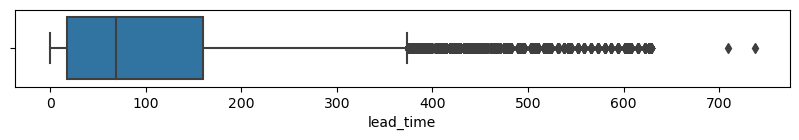


Attribute: [ adults ]   Good Range: [ -2.0 , 6.0 ]   Number of Outliers: [ 15 ]
Index           Value
 2174          55.000
 1644          50.000
 1540          40.000
 1918          27.000
 1963          27.000
 1588          26.000
 1753          26.000
 1885          26.000
 2004          26.000
 2165          26.000
   19          22.000
 2229          20.000
 2419          20.000
 2418          10.000
 2230           6.000


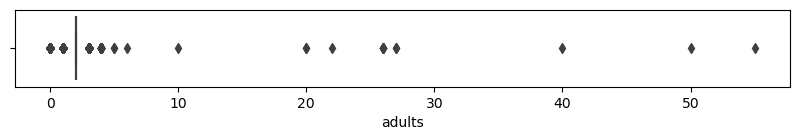


Attribute: [ children ]   Good Range: [ -3.0 , 5.0 ]   Number of Outliers: [ 1 ]
Index           Value
  329          10.000


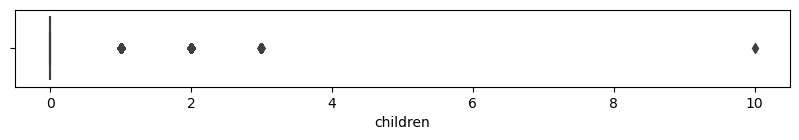


Attribute: [ babies ]   Good Range: [ -1.5 , 2.5 ]   Number of Outliers: [ 2 ]
Index           Value
46620          10.000
78657           9.000


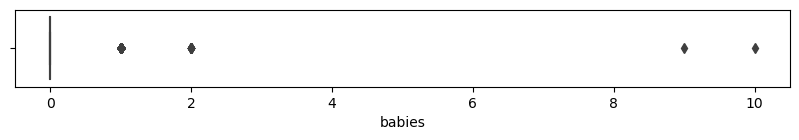


Attribute: [ previous_bookings_not_canceled ]   Good Range: [ -42.0 , 70.0 ]   Number of Outliers: [ 3 ]
Index           Value
76732          72.000
76731          71.000
76730          70.000


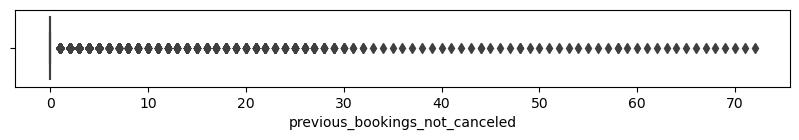


Attribute: [ booking_changes ]   Good Range: [ -9.0 , 15.0 ]   Number of Outliers: [ 10 ]
Index           Value
88018          21.000
41021          20.000
111683          18.000
 1656          17.000
51965          17.000
 9107          16.000
111690          16.000
51953          15.000
51978          15.000
111684          15.000


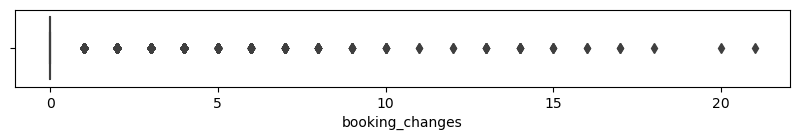


Attribute: [ days_in_waiting_list ]   Good Range: [ -225.0 , 375.0 ]   Number of Outliers: [ 60 ]
Index           Value
58153         391.000
58154         391.000
58155         391.000
58156         391.000
58158         391.000
58159         391.000
58160         391.000
58161         391.000
58162         391.000
58168         391.000
58172         391.000
58173         391.000
58177         391.000
58178         391.000
58180         391.000
59077         391.000
59078         391.000
59085         391.000
59086         391.000
59091         391.000
59092         391.000
59096         391.000
59097         391.000
59106         391.000
59110         391.000
59111         391.000
59114         391.000
59121         391.000
59124         391.000
59143         391.000
59396         391.000
59398         391.000
59404         391.000
59408         391.000
59409         391.000
59412         391.000
59413         391.000
59422         391.000
59431         391.000
59432         391.000

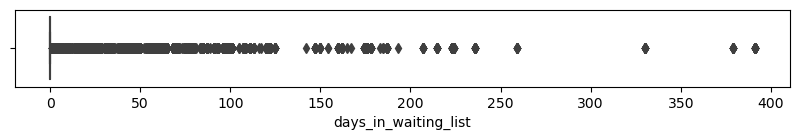


Attribute: [ adr ]   Good Range: [ -2.75 , 311.25 ]   Number of Outliers: [ 190 ]
Index           Value
48516        5400.000
111404         510.000
15084         508.000
103913         451.500
13143         450.000
13392         437.000
39156         426.250
39569         402.000
39119         397.380
13324         392.000
39518         392.000
13407         388.000
39544         388.000
39178         387.000
 9729         384.000
39961         383.000
 9769         382.000
39645         382.000
13196         378.000
13231         378.000
13275         378.000
13481         378.000
13595         378.000
38996         378.000
38613         377.000
103790         375.500
39371         372.710
118516         372.330
39096         372.000
 7420         369.000
39253         368.100
14604         367.000
31572         367.000
93847         365.000
13048         363.000
13049         363.000
38803         360.000
38658         359.500
26691         359.000
26937         359.000
13200      

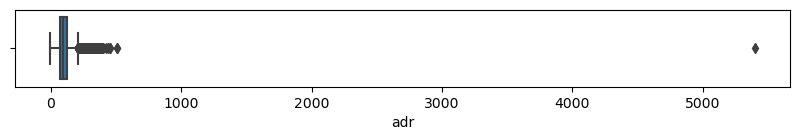


Attribute: [ required_car_parking_spaces ]   Good Range: [ -1.5 , 2.5 ]   Number of Outliers: [ 5 ]
Index           Value
29046           8.000
29047           8.000
38118           3.000
102763           3.000
110813           3.000


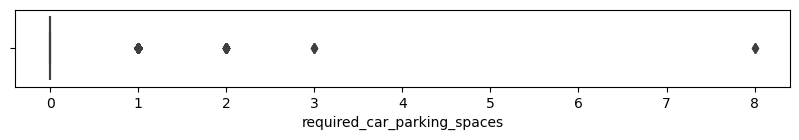


Attribute: [ total_of_special_requests ]   Good Range: [ -3.0 , 5.0 ]   Number of Outliers: [ 40 ]
Index           Value
 7861           5.000
11126           5.000
14597           5.000
14922           5.000
14923           5.000
24631           5.000
27289           5.000
27478           5.000
29907           5.000
29950           5.000
32268           5.000
39028           5.000
39130           5.000
39526           5.000
70115           5.000
78820           5.000
78821           5.000
78823           5.000
97073           5.000
97100           5.000
97262           5.000
98411           5.000
98675           5.000
99888           5.000
99889           5.000
101570           5.000
102062           5.000
109512           5.000
109591           5.000
110083           5.000
110084           5.000
111910           5.000
111912           5.000
113916           5.000
114771           5.000
114910           5.000
116456           5.000
116458           5.000
118818           5.000
119162

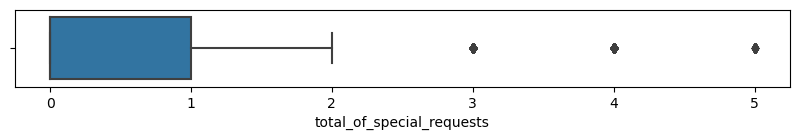


Attribute: [ stays_in_weekend_nights ]   Good Range: [ -6.0 , 10.0 ]   Number of Outliers: [ 22 ]
Index           Value
14039          19.000
14038          18.000
 9840          16.000
33925          16.000
101795          16.000
54705          14.000
88018          14.000
 1656          13.000
32590          13.000
106562          13.000
 3821          12.000
 3851          12.000
34615          12.000
34899          12.000
35060          12.000
20836          10.000
31405          10.000
32947          10.000
33235          10.000
33621          10.000
62583          10.000
62584          10.000


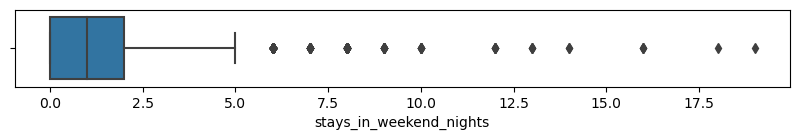


Attribute: [ stays_in_week_nights ]   Good Range: [ -15.0 , 25.0 ]   Number of Outliers: [ 21 ]
Index           Value
14039          50.000
14038          42.000
101795          41.000
 9840          40.000
33925          40.000
88018          35.000
54705          34.000
 1656          33.000
32590          32.000
 3821          30.000
 3851          30.000
34615          30.000
34899          30.000
106562          30.000
35060          26.000
20836          25.000
31405          25.000
32947          25.000
33235          25.000
33621          25.000
103283          25.000


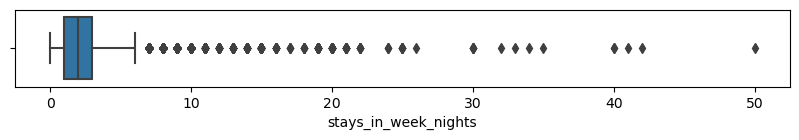

In [15]:
outlier_indices = []
quantile_list=[0.1,0.01,0.01,0.005,0.001,0.0005,0.001,0.0037,0.68,0.01,0.03,0.01,0.01]
for att, num in zip(numerical_attribute_names,quantile_list):
    if(att == "adr"):
        high = 0.95
    else:
        high = 1-num
    outlier_indices = find_outliers(data_df, att, num, high)
    outlier_indices.extend(outlier_indices)
#print(f"All Outlier Indices: {outlier_indices}")

**Discussion**

I am using the qunatile to outlier of each numberical attribute. In the metadata, each of attributes has different level of distribution. For example, like **children and baby**, most of the values are zero. Thus, setting **quartile low and high** to **0.25 and 0.75** would cause the too many number of outliers. 
This condition continued throughout the all the attributes. So, I set the each of the quartile low and high appropriatly to reduce the range of good range low and good range high. 

As a result, most of the attributes seem to have appropriate values. However, adr seems to have outlier. The **adr** has negative number **-6.380** and too big number **5400** seeems to be wrong. Problem for solving this outlier is discussed abouve.

***
## Section: 2.5 - Explore the relationships among the attributes.
- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical
***

## **Categorical vs Categorical**

In comparing the categorical vs categorical, I treid to compare the class attribute "is_canceled" with other categorical attributes. Thus, we can easily see through the graph how each of the attribute might cause the cancellation ratio and find which attributes affect the cacenlation ratio more significantly.

### **Cancel vs. Repeated Guest**

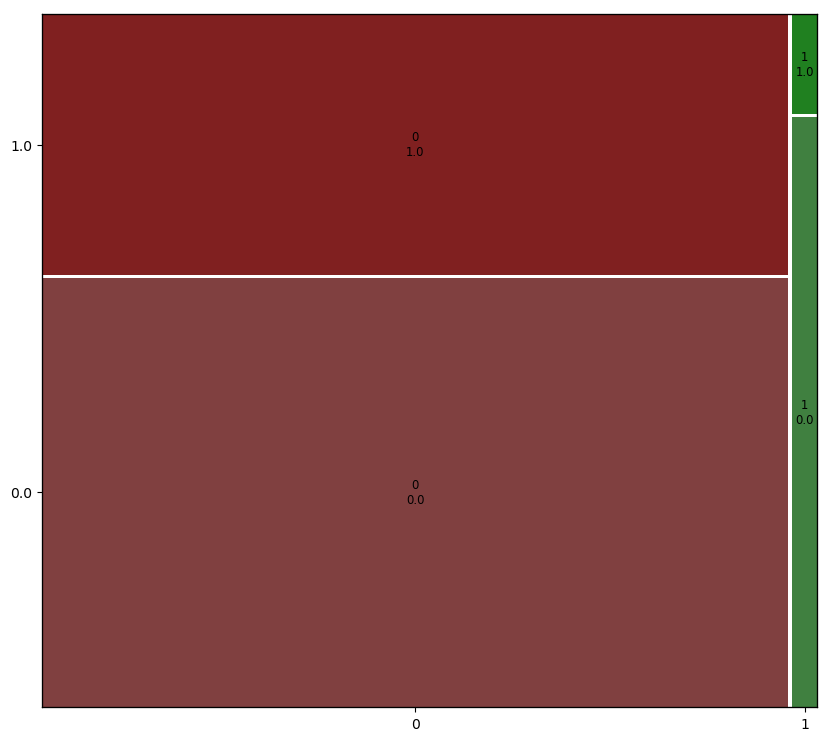

In [25]:
# EXAMPLE: Visualize the relationship between two specific categorical variables.
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(10,9)
mosaic(data_df.sort_values(by='is_canceled', ascending=True), ['is_repeated_guest', 'is_canceled'], title='')
plt.show()

**Discussion:**

In the comparing the categorical attribute, I am trying to find the relationship between categorical attributes.
When I am comparing the **is_canceled** vs. **is_repeated_guest**, if customer is repeated guest, there are low likely that the customer will cancel the reservation

Thus, we can know that focusing the service to the not repeated guest will help to reduce the cancellation ratio.

### **Cancel vs. Deposit Type**

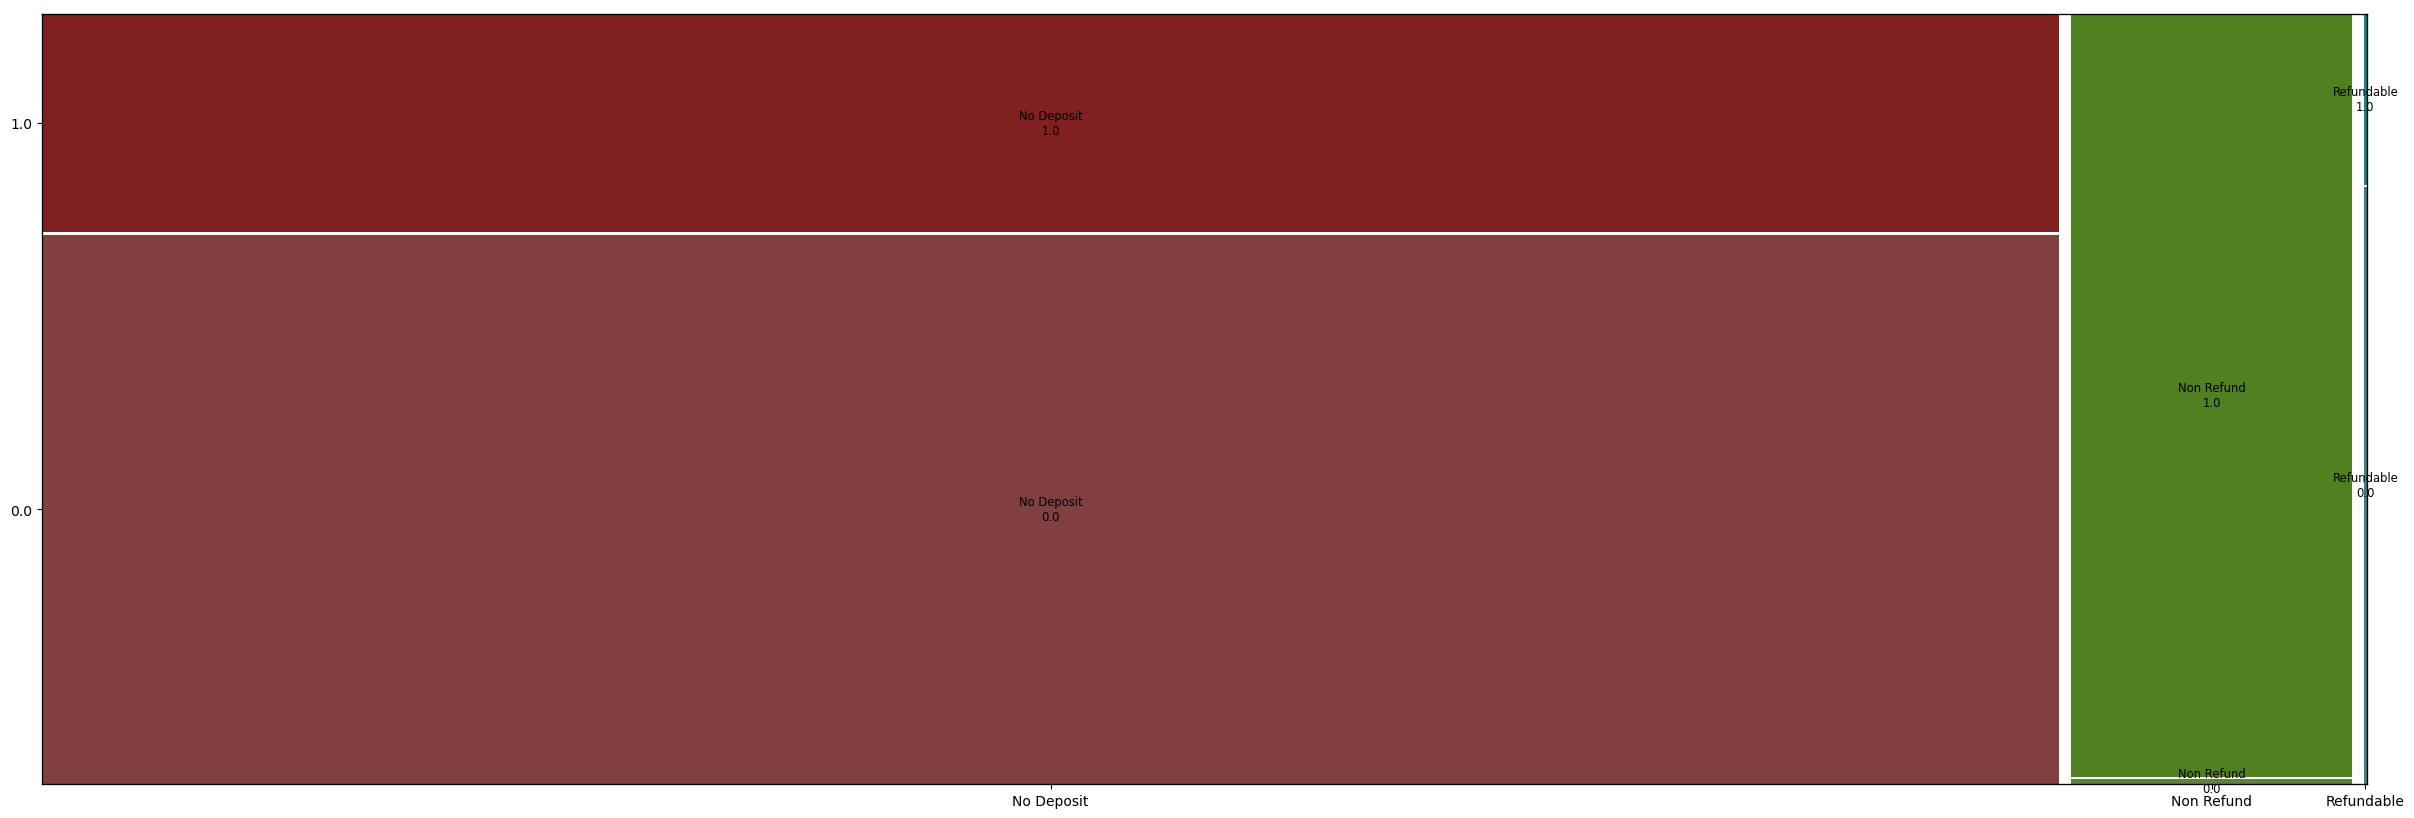

In [21]:
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(30,10)
mosaic(data_df.sort_values(by='is_canceled', ascending=True), ['deposit_type', 'is_canceled'], title='')
plt.show()

**Discussion**

When I am comparing the **is_canceled** vs. **Deposit type**, majority of customers were no deposite nad non refundable types of customer. Furthermore, in ratio, non refundable types of custmoer usually makes many cancellation followed by no deposite type customer and refundable type of customer does not cancel the reservation.

At first, I assumed that **non refund** type has lower cancellation ratio. However, result shows opposite. I hypothesize that non refundable type would have lower room rate. As a result, it would be easier for customer to cancel that reservation. Thus, providing more service to non refund type of customer, for example giving gift card if you do not cancel reservation, will help to lower the cancellation ratio.  

### **Cancel vs. Month**

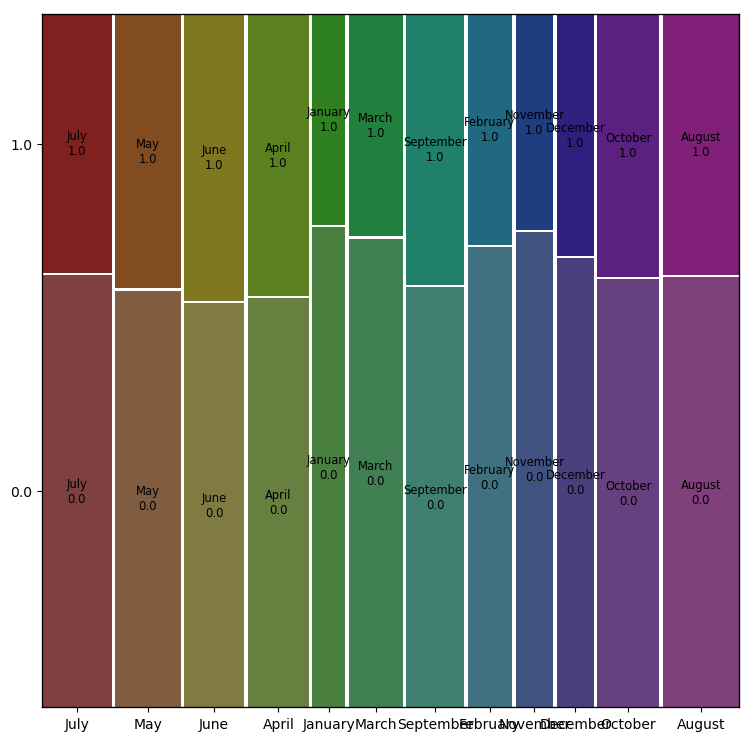

In [18]:
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(9,9)
mosaic(data_df.sort_values(by='is_canceled', ascending=True), ['arrival_date_month', 'is_canceled'], title='')
plt.show()

**Discussion**

When I tried to find which **month**, especially which season, would customer likely to cancel the reservation. Because I assumed that weather might affect the cancellation. In January, March and November, there are little more likely that customer will cancel the reservation. However, there seems to be no much difference of cancellation ratio due to season.

### **Cancel vs. Hotel**

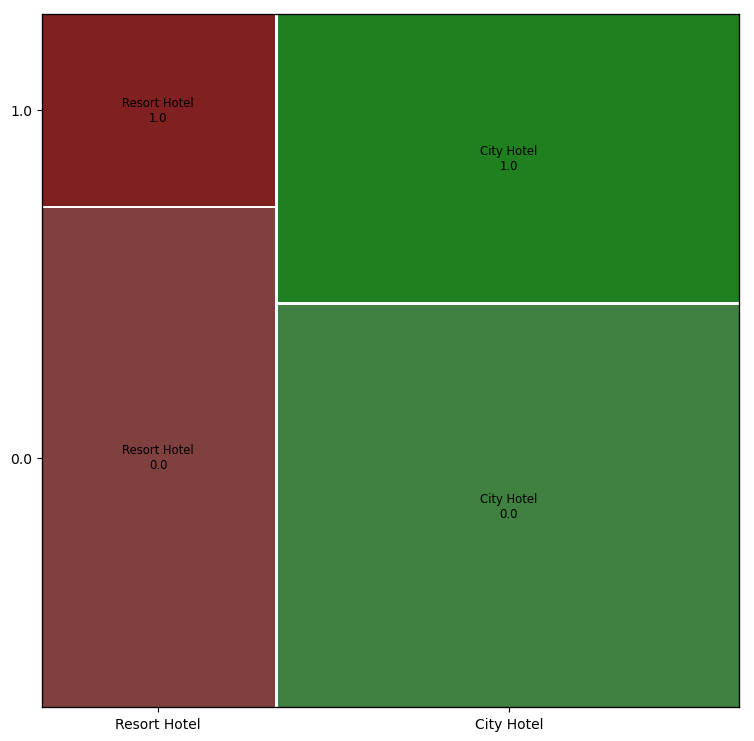

In [24]:
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(9,9)
mosaic(data_df.sort_values(by='is_canceled', ascending=True), ['hotel', 'is_canceled'], title='')
plt.show()

**Discussion**

I assumed that there will be definetly different ratio between **hotel** for cancellation ratio. Because, according to the location, condition, and employee of the hotel, there must be differences that affect the cancellation of customer. As a result, eventhough more people visit the city hotel, people cancel more often than resort hotel. 

As I mentioned, it might the the condition that hotel has causing the cancellation. However, we should not carelessly assume that city hotel has worse conditon than resort hotel. Becuae, for example, City hotel has the cheaper room rate which causes customer to easily cancel the reservation or some other unknown reasons.

Thus, further investigation is needed to see why city hotel has the higher cancellation ratio. 


### **Cancel vs Market Seg**

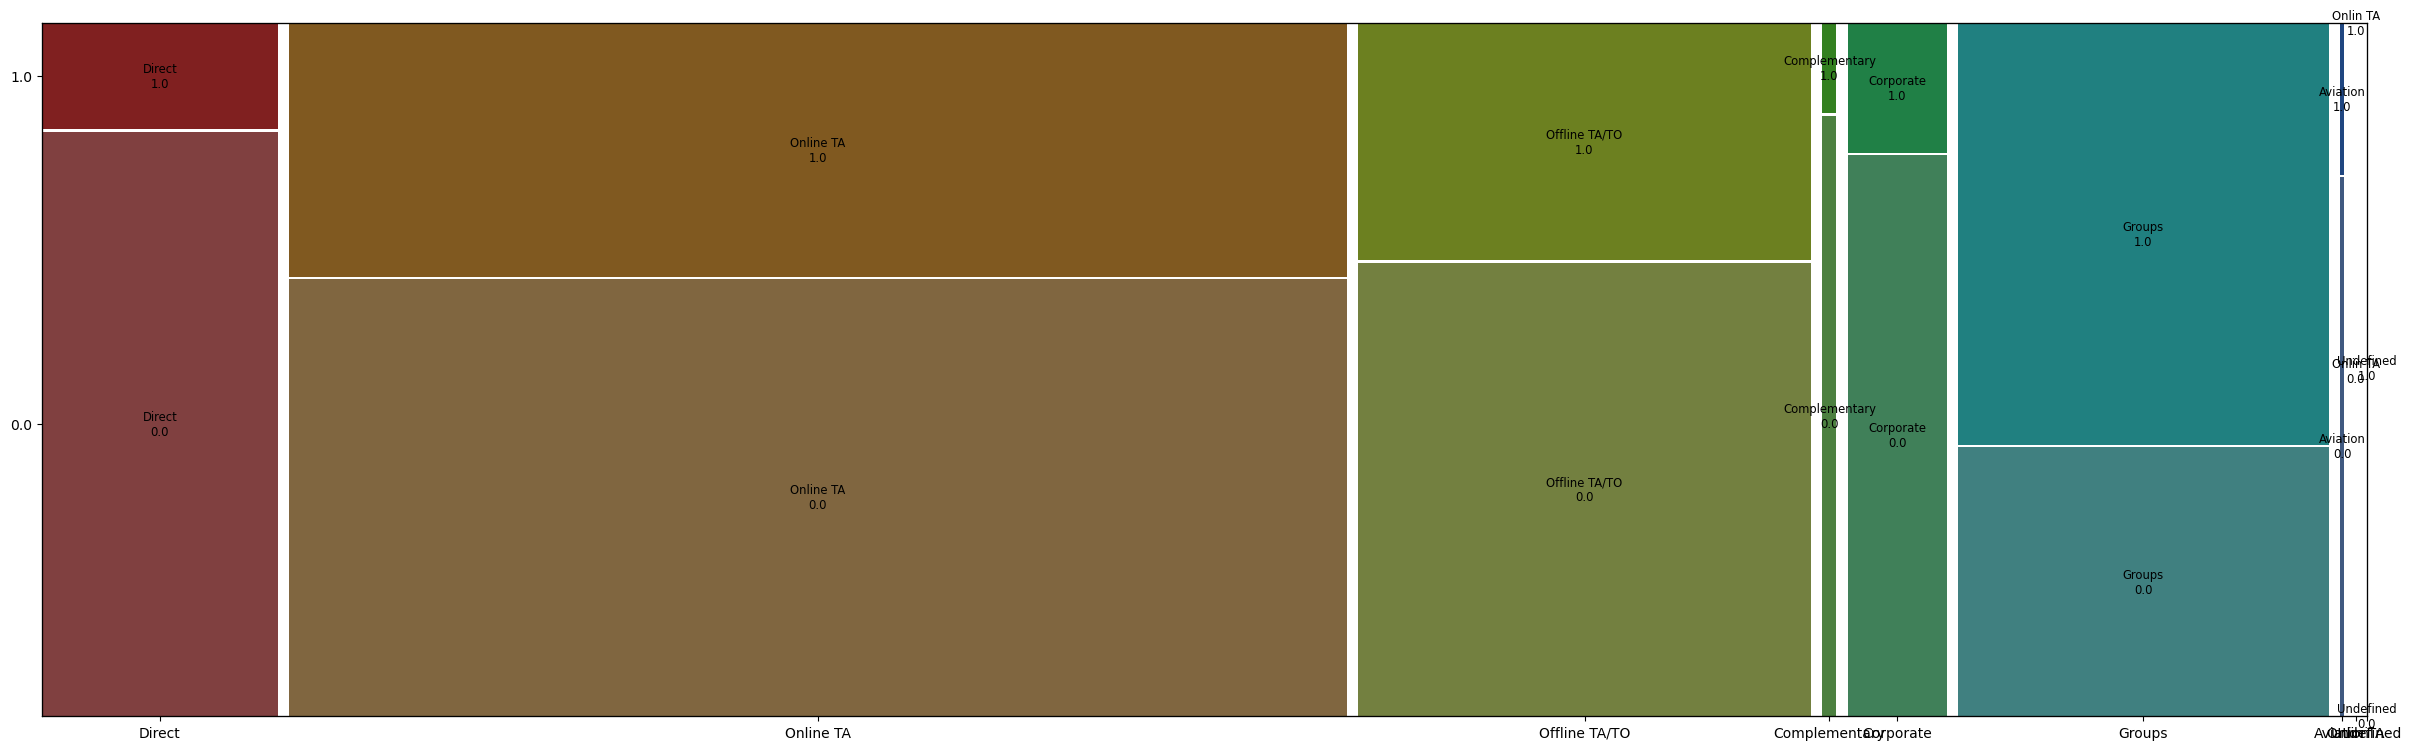

In [122]:
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(30,9)
mosaic(data_df.sort_values(by='is_canceled', ascending=True), ['market_segment', 'is_canceled'], title='')
plt.show()

**Discussion**

Based on the result, it seems like most of the market_segment does not have significant differences. Only Market_segment of group stands out on having higher cancelation ratio. Further investigation might needs to know why group market_segment has higher cancelation ratio.

### **Cancel vs. Distribution Channel**

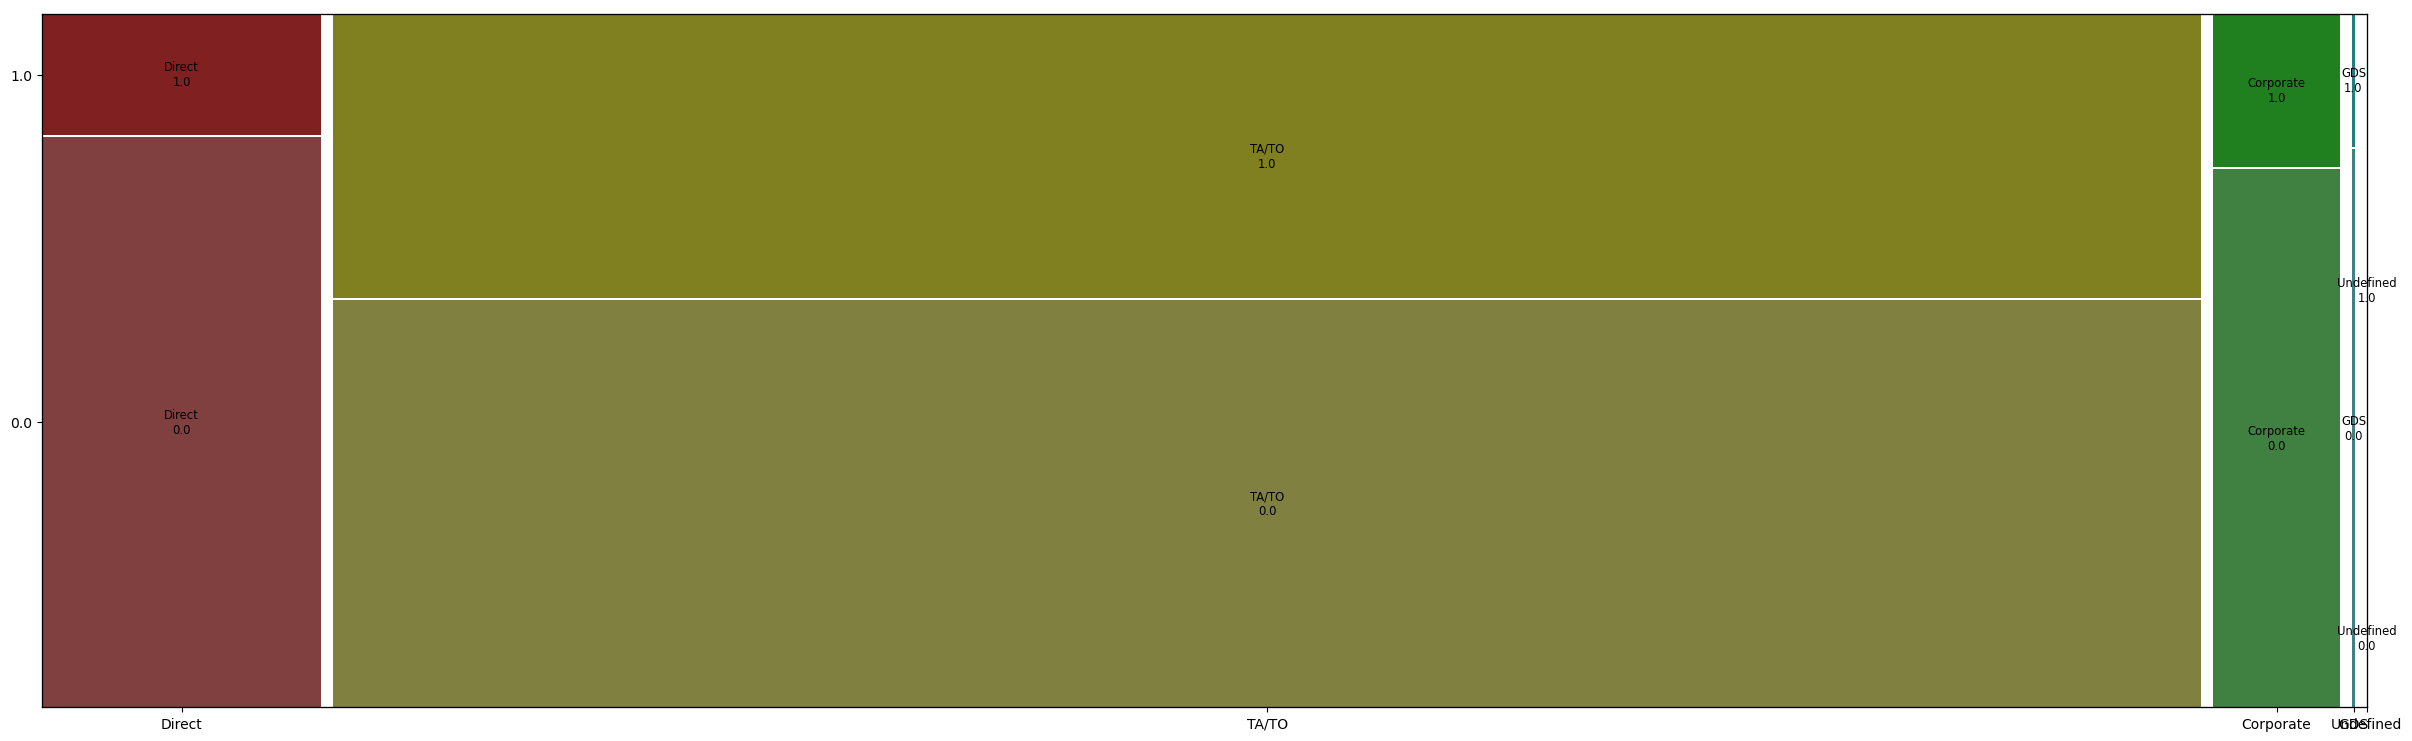

In [123]:
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(30,9)
mosaic(data_df.sort_values(by='is_canceled', ascending=True), ['distribution_channel', 'is_canceled'], title='')
plt.show()

**Discussion**

TA/TO seems to have higher cancelation ratio. However, it is not stand out significantly.

### **Cancel vs. Agent**

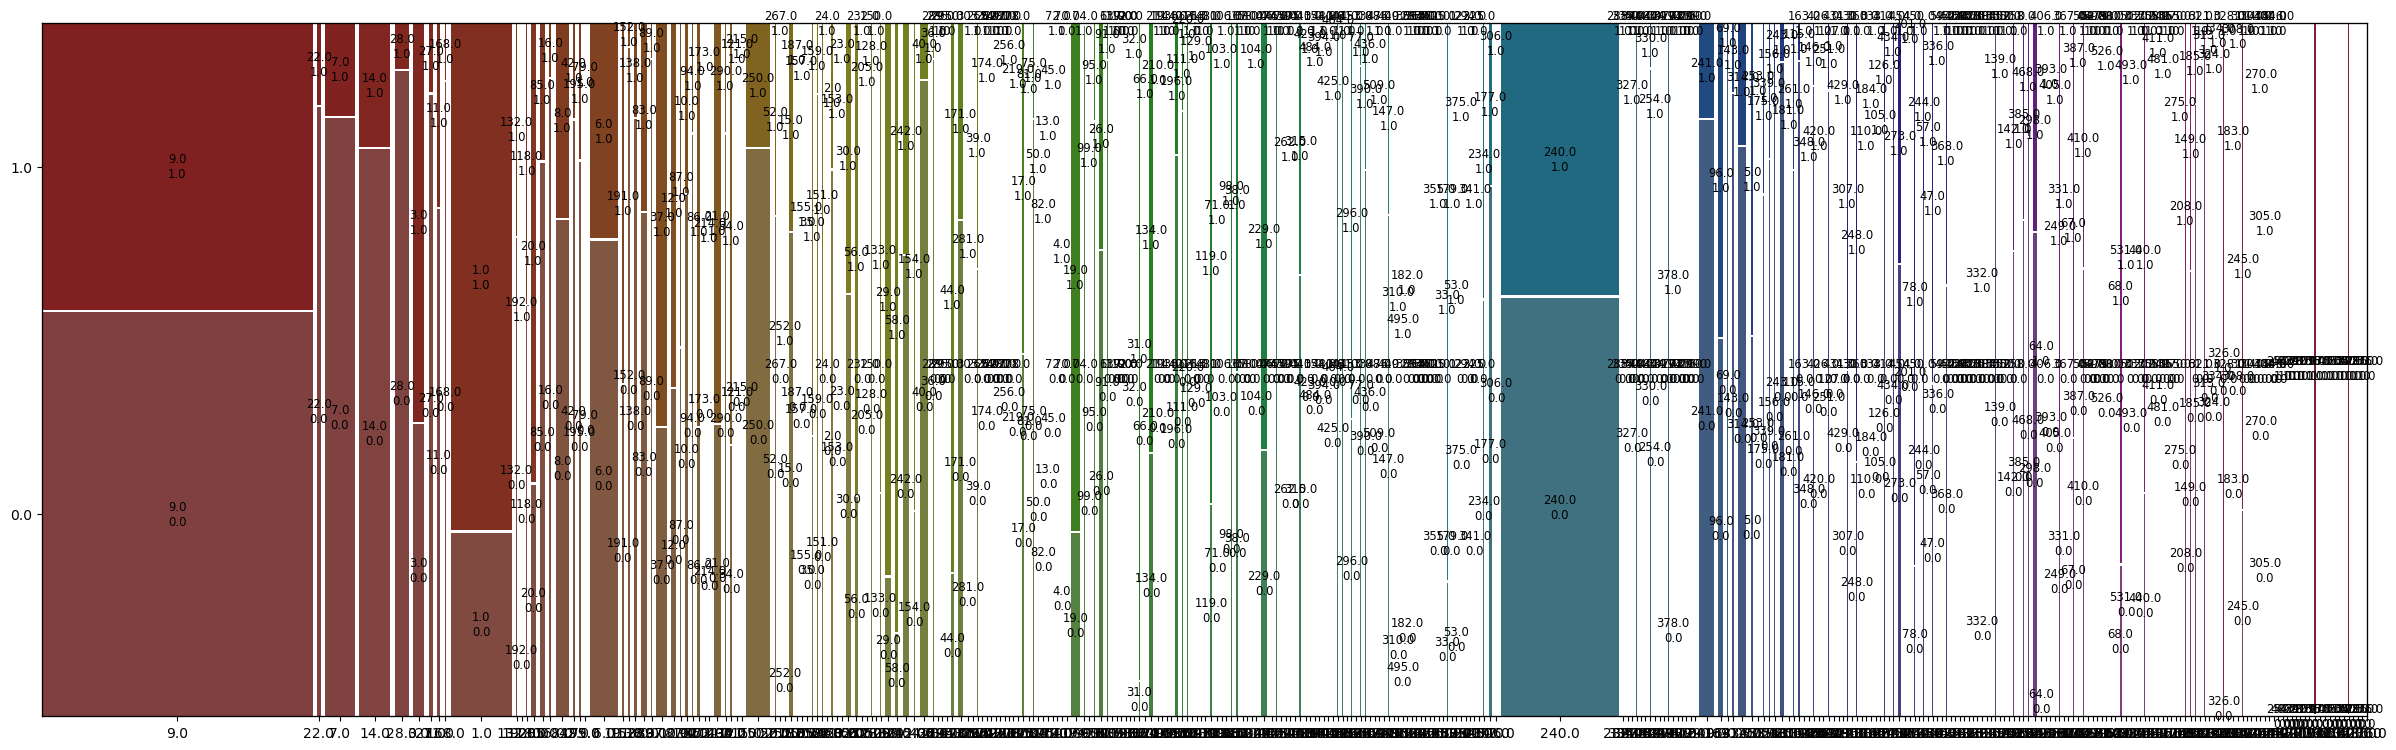

In [124]:
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(30,9)
mosaic(data_df.sort_values(by='is_canceled', ascending=True), ['agent', 'is_canceled'], title='')
plt.show()

### **Cancel vs Comapny**

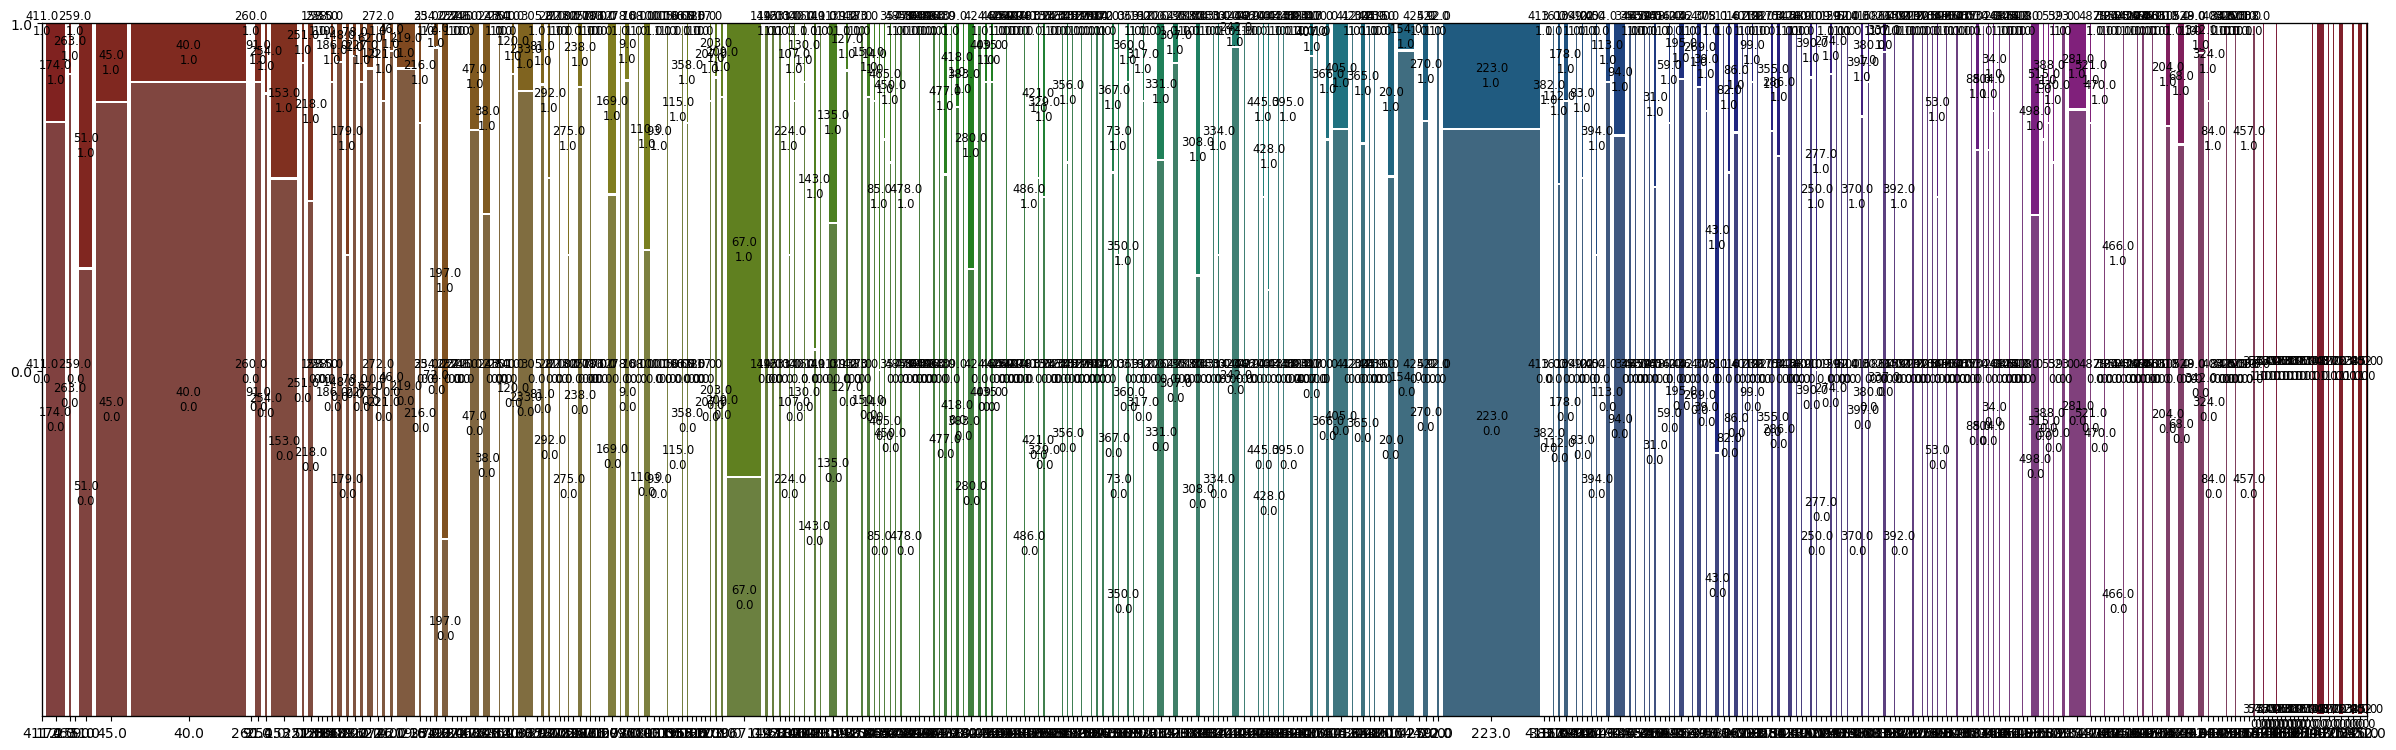

In [125]:
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(30,9)
mosaic(data_df.sort_values(by='is_canceled', ascending=True), ['company', 'is_canceled'], title='')
plt.show()

### **Cancel vs. Country**

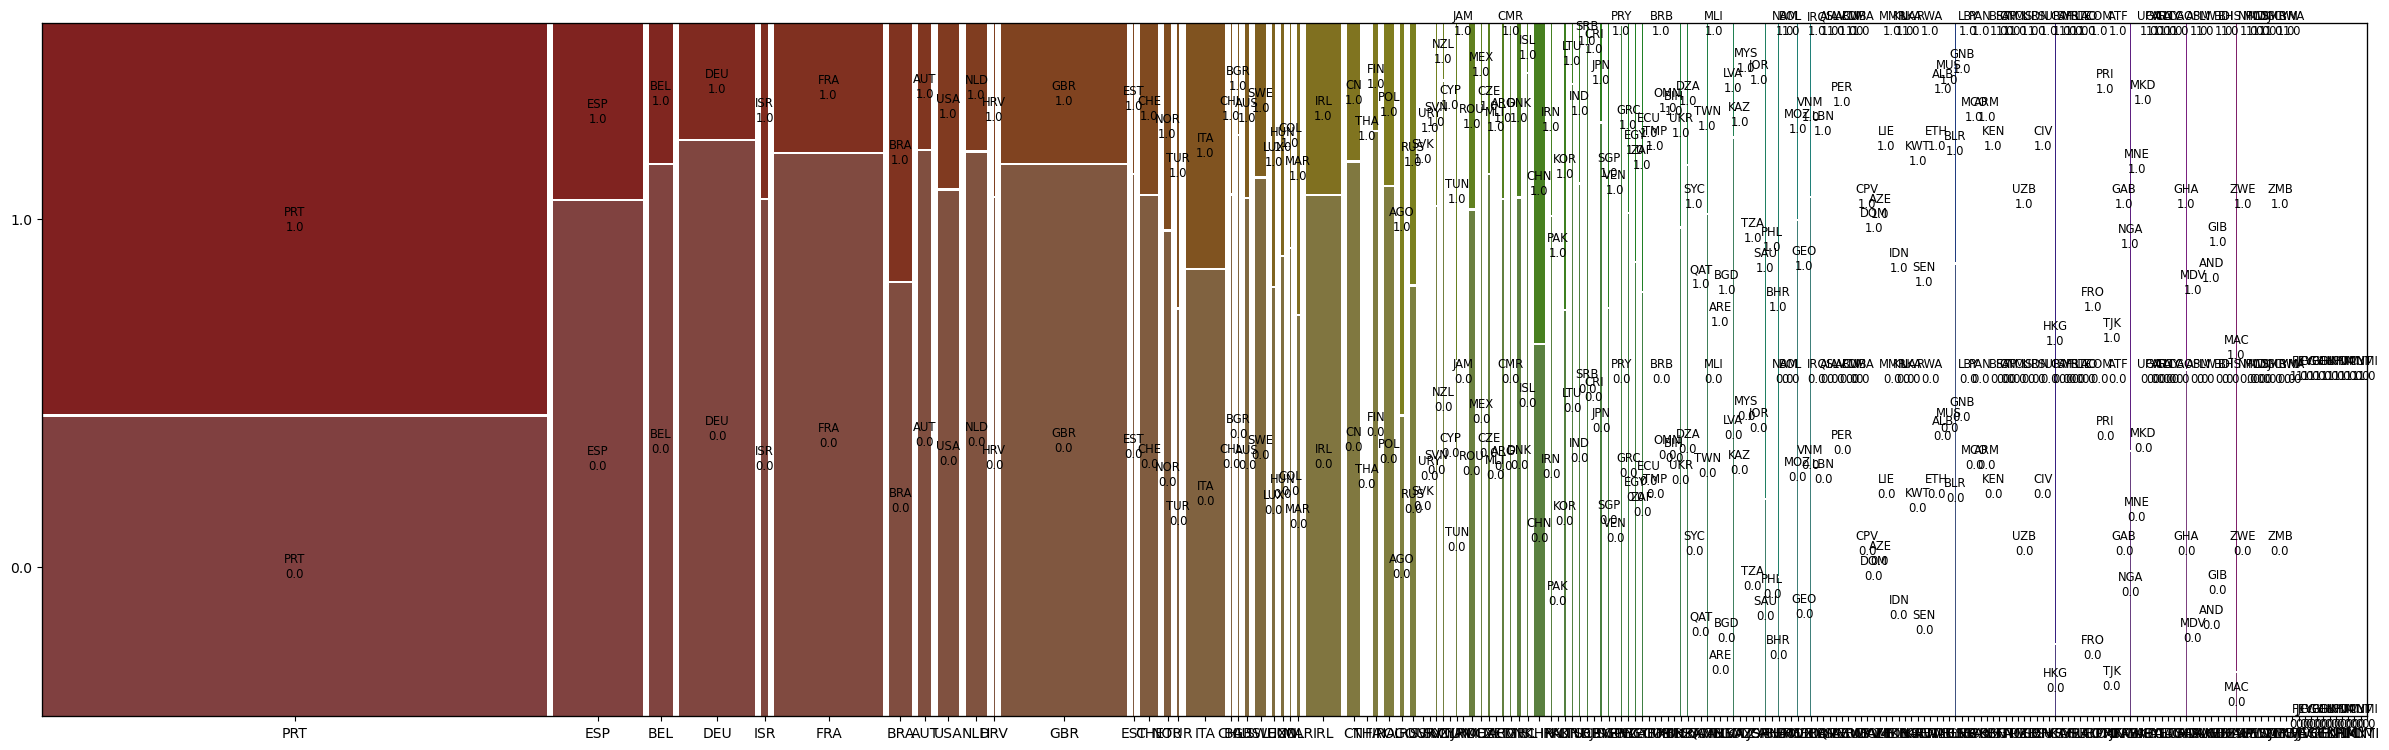

In [27]:
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(30,9)
mosaic(data_df.sort_values(by='is_canceled', ascending=True), ['country', 'is_canceled'], title='')
plt.show()
#Did not run the code. Reason below.

**Discussion**

For more analysis, I tried to compare **cancellation** vs. **country** and **agnet** and **Company**. However, when I run the code, graph seems to be too blurry and it is difficult to see the detail information, because there are too many countires in the data. If I have better tool to use, finding the cancellation ratio by customer's country would help to analyze cancellation ratio more.

### **Chi2_Matrix**

In [97]:
# Use Chi-Squared test to check for a relationship between all pairs of categorical variables.
def create_chi2_matrix(df):
    #See: https://medium.com/analytics-vidhya/constructing-heat-map-for-chi-square-test-of-independence-6d78aa2b140f
    import pandas as pd
    import numpy as np
    import os 
    from sklearn.feature_selection import chi2
    from scipy import stats
    import seaborn as sns
    import matplotlib.pylab as plt

    column_names=df.columns # Assign column names to row indexs 
    chisqmatrix=pd.DataFrame(df,columns=column_names,index=column_names)

    # Set counters to zero
    outercnt=0
    innercnt=0

    for icol in column_names: # outer loop
        for jcol in column_names: # inner loop
            # Convert to cross tab - for Chi-square test, we have to first convert variables into contigency table
            mycrosstab=pd.crosstab(df[icol],df[jcol])
            #print(mycrosstab)
            # Get p-value and other information
            stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
            #print("Details:",icol,jcol,stat,p,dof)
            # Rounding very small p-values to zero
            chisqmatrix.iloc[outercnt,innercnt]=round(p,10)
            # Expected frequencies should be at least 5 for the majority (80%) of the cells.
            # Check expected frequency of each group
            cntexpected=expected[expected<5].size
            # Getting percentage 
            perexpected=((expected.size-cntexpected)/expected.size)*100
            if perexpected<20:
                chisqmatrix.iloc[outercnt,innercnt]=2.00        # Assign 2 as a flag 
            if icol==jcol:
                chisqmatrix.iloc[outercnt,innercnt]=0.00
            innercnt=innercnt+1
        outercnt=outercnt+1
        innercnt=0
    return chisqmatrix

In [98]:
chi2matrix = create_chi2_matrix(data_df[categorical_attribute_names])
print(chi2matrix.head(999))

                          hotel meal country market_segment  \
hotel                       0.0  0.0     0.0            0.0   
meal                        0.0  0.0     0.0            0.0   
country                     0.0  0.0     0.0            0.0   
market_segment              0.0  0.0     0.0            0.0   
distribution_channel        0.0  0.0     0.0            0.0   
reserved_room_type          0.0  0.0     2.0            0.0   
assigned_room_type          0.0  0.0     2.0            0.0   
deposit_type                0.0  0.0     0.0            0.0   
agent                       0.0  0.0     2.0            0.0   
company                     0.0  2.0     2.0            2.0   
customer_type               0.0  0.0     0.0            0.0   
reservation_status          0.0  0.0     0.0            0.0   
arrival_date_month          0.0  0.0     0.0            0.0   
arrival_date_year           0.0  0.0     0.0            0.0   
arrival_date_week_number    0.0  0.0     2.0           

**Discussion:**

The code is using Chi-Squared test to check for relationships between each of categorical variables. If a p-value is lower than chosen alpha(assume 0.05), then the H0 hypothesis that there is NO relationship between the two variables is REJECTED. Thus, later analysis, we can reduce the number of attribute to reduce the noise of the result that help to find the cancellation ratio much better.

There seems to be unrelated pair of categorical attributes. For example, there is no distict relationship between reserved_room_type and country and assigned_room_type and country. 

Thus, using this infomration in section 3 to find better attributes to analyze the data. 

## **Categorical vs Numberical**

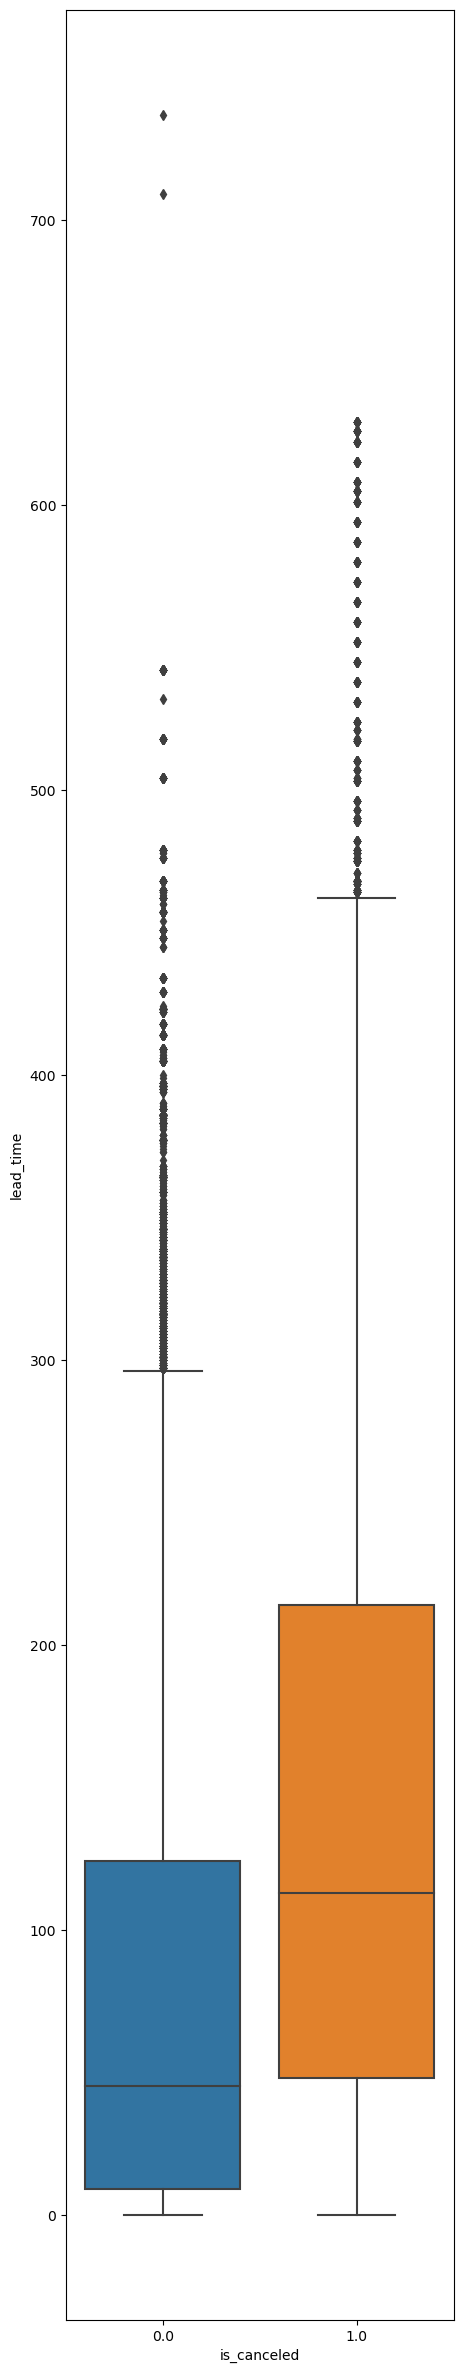

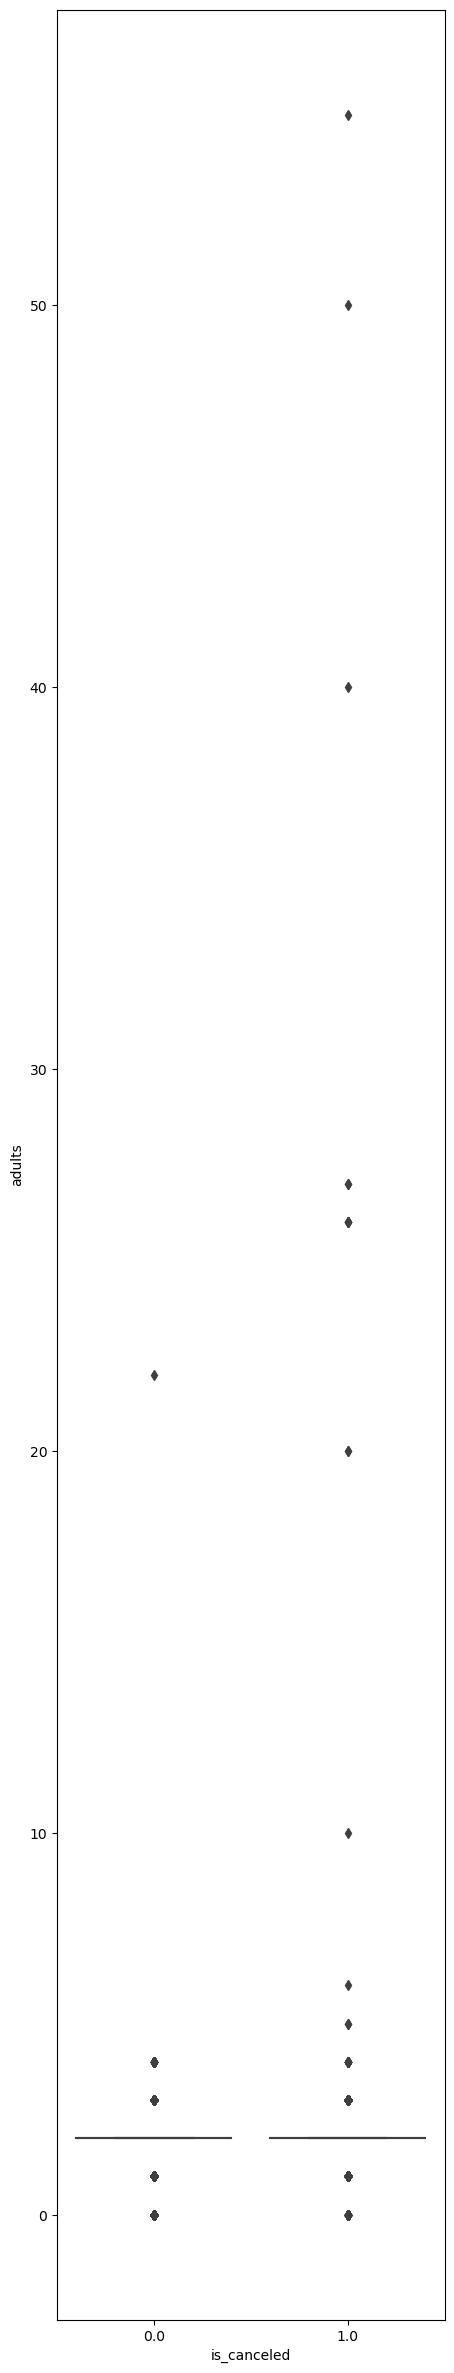

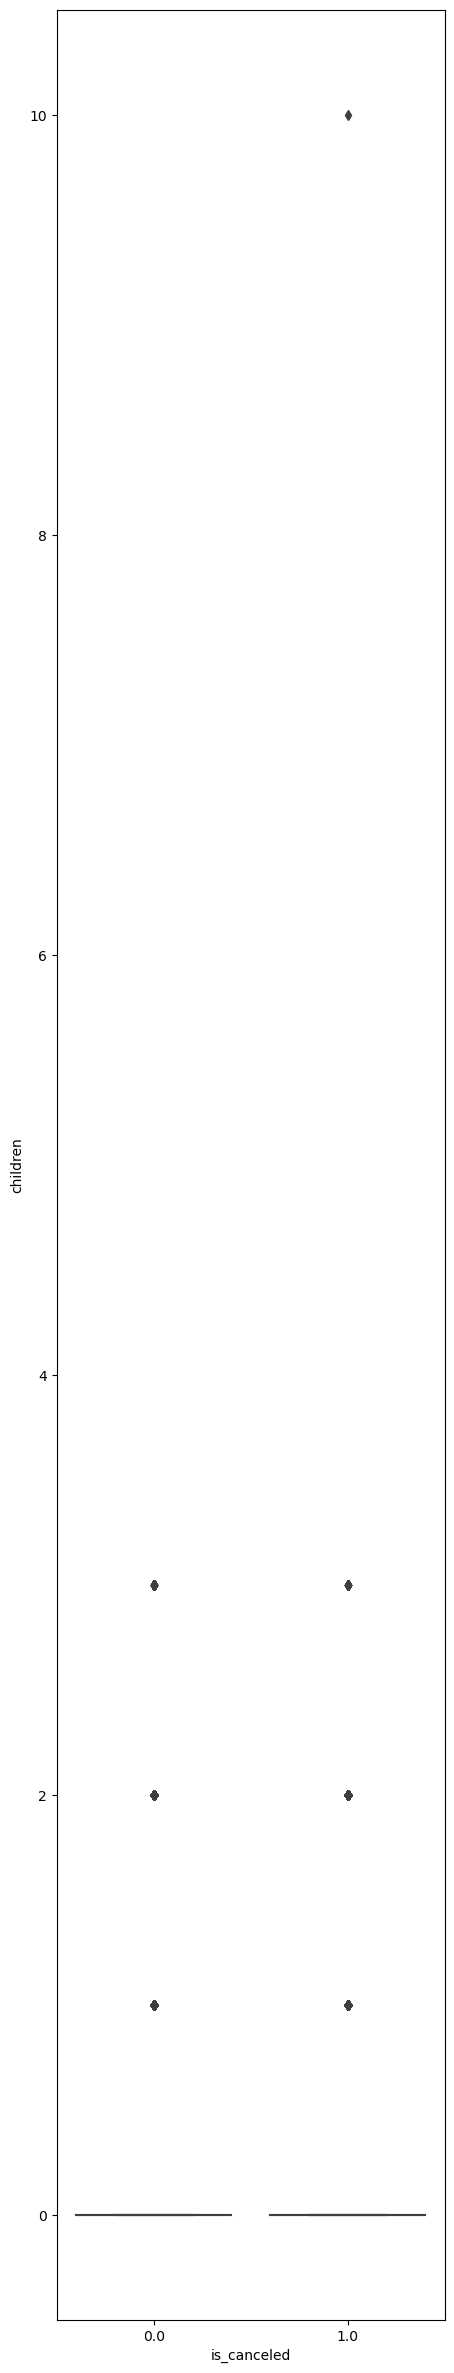

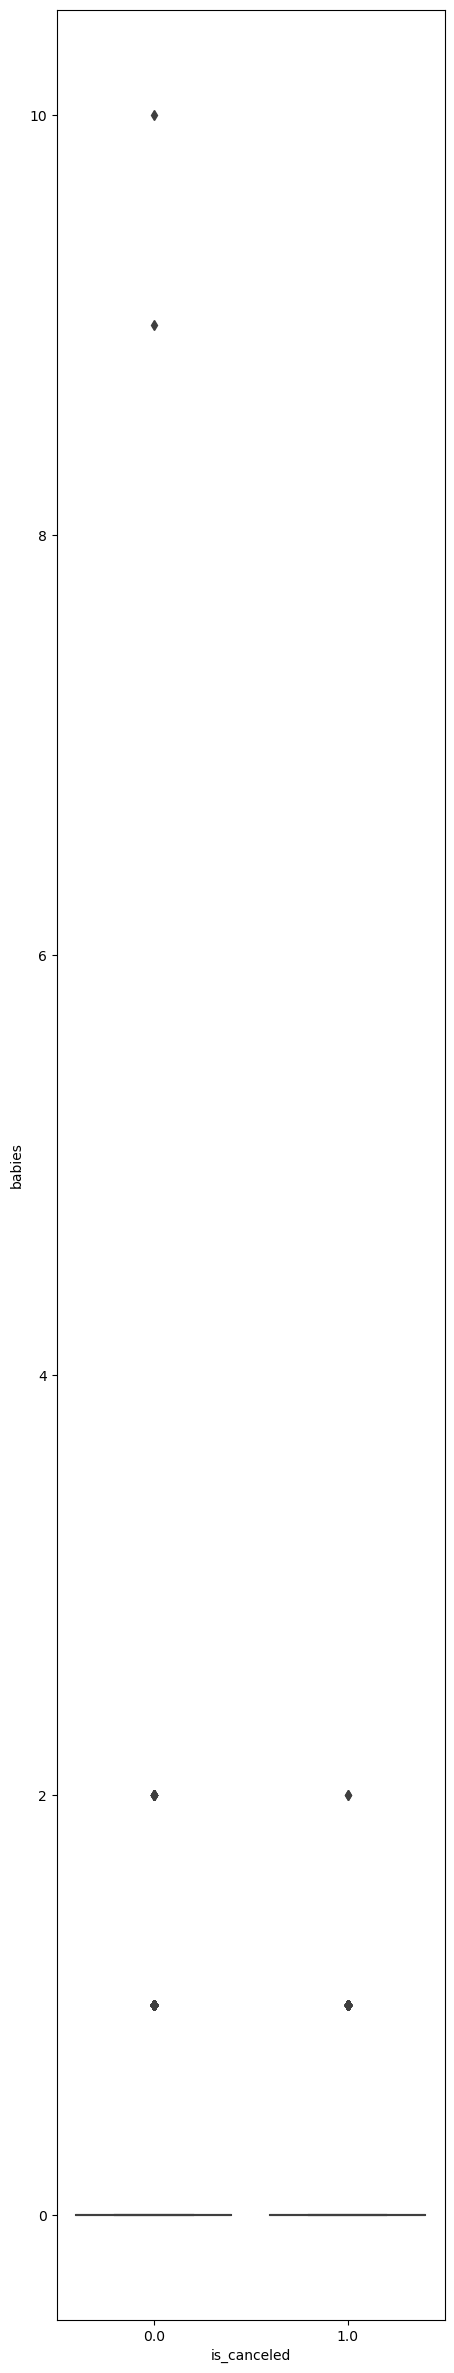

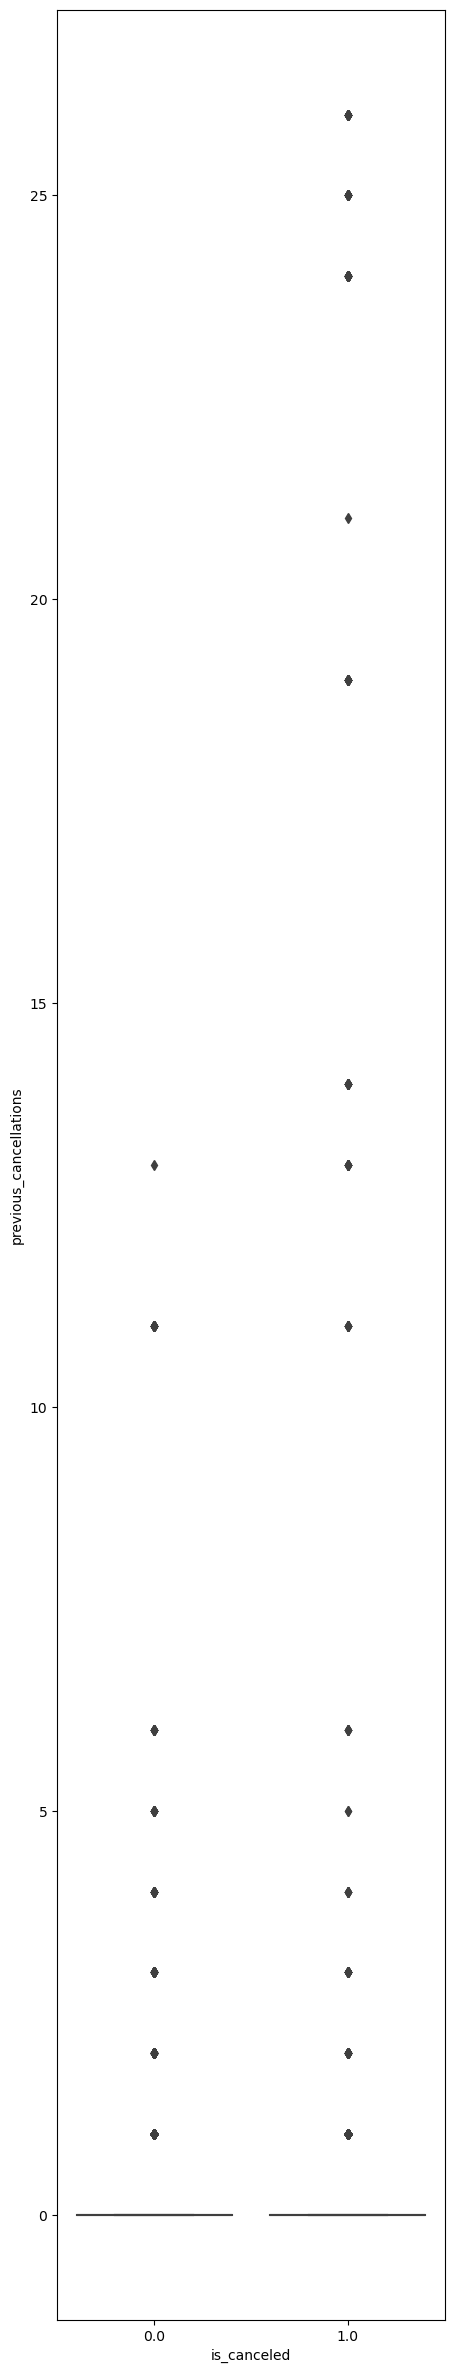

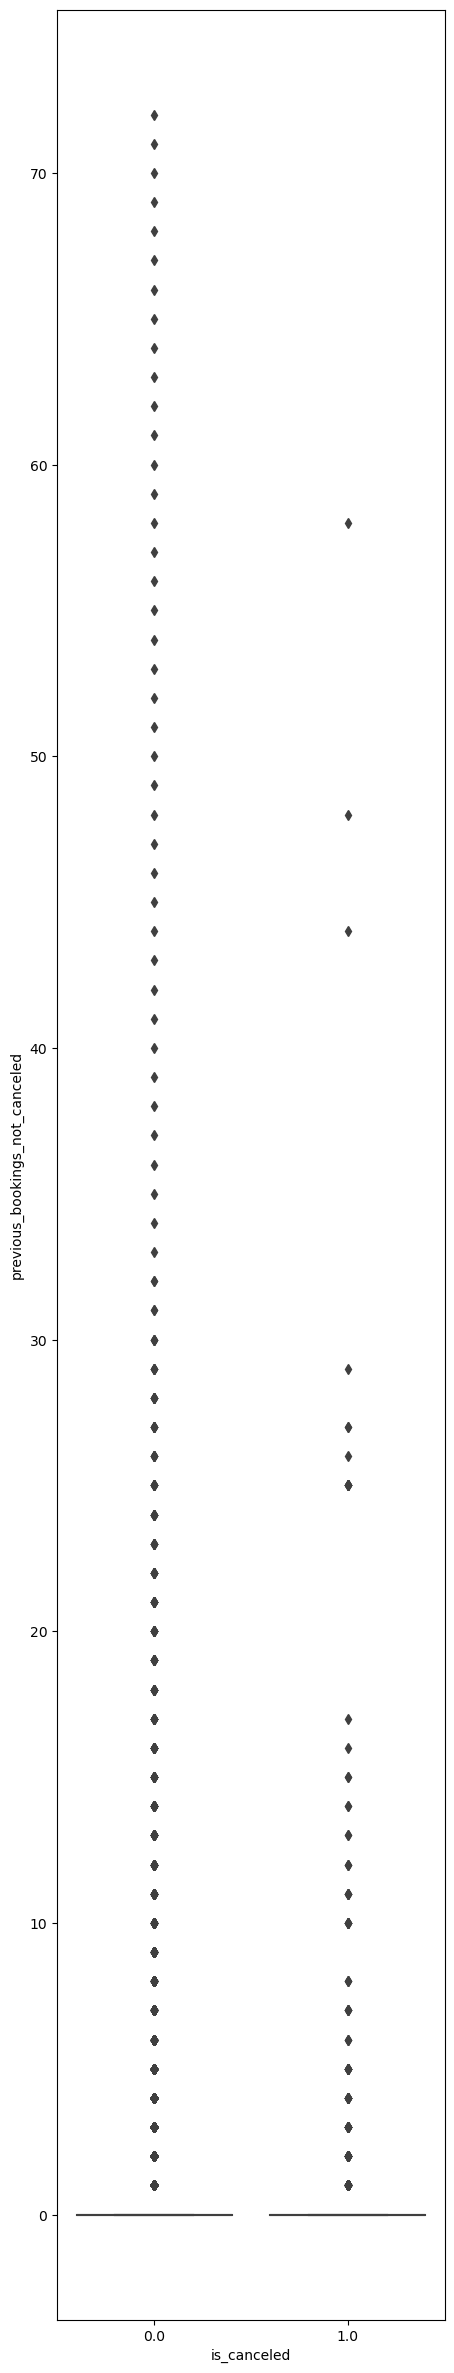

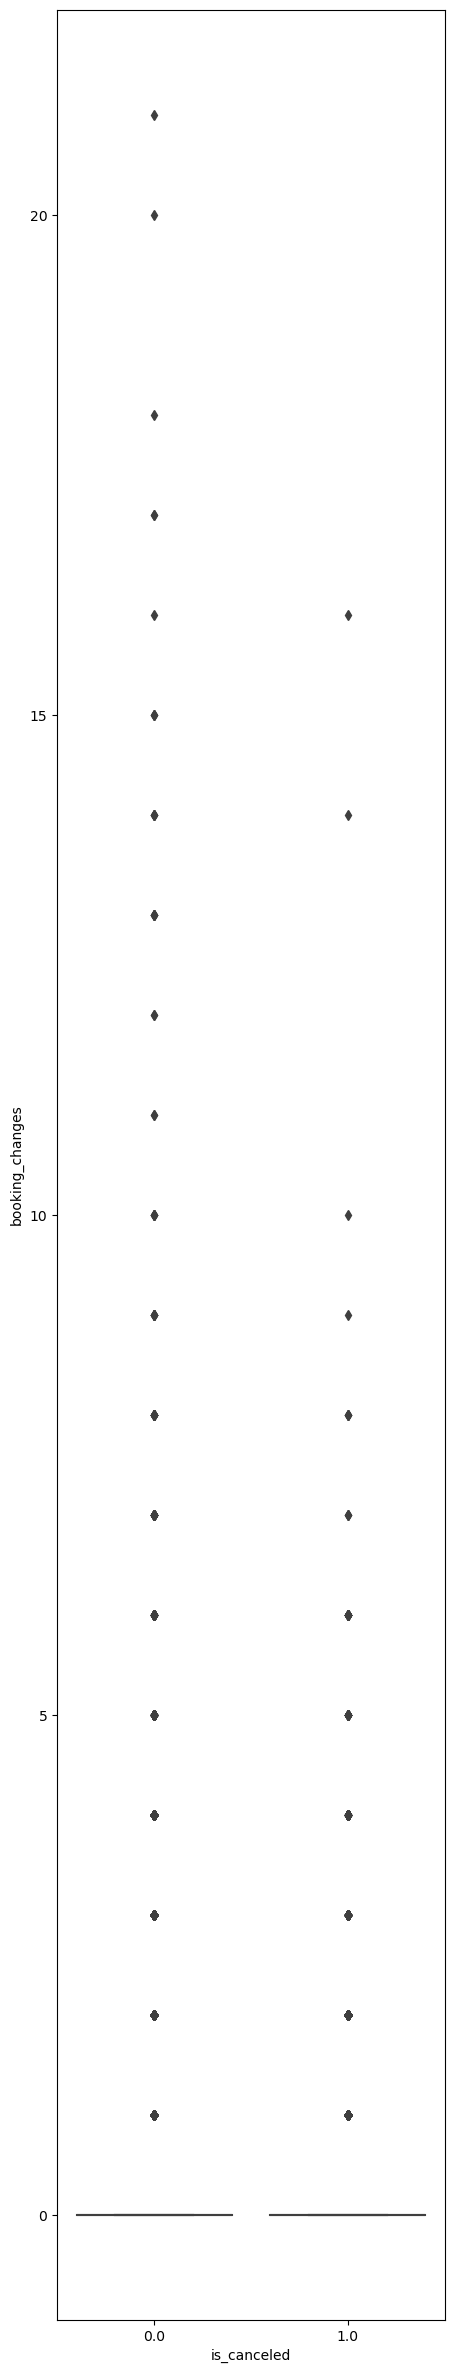

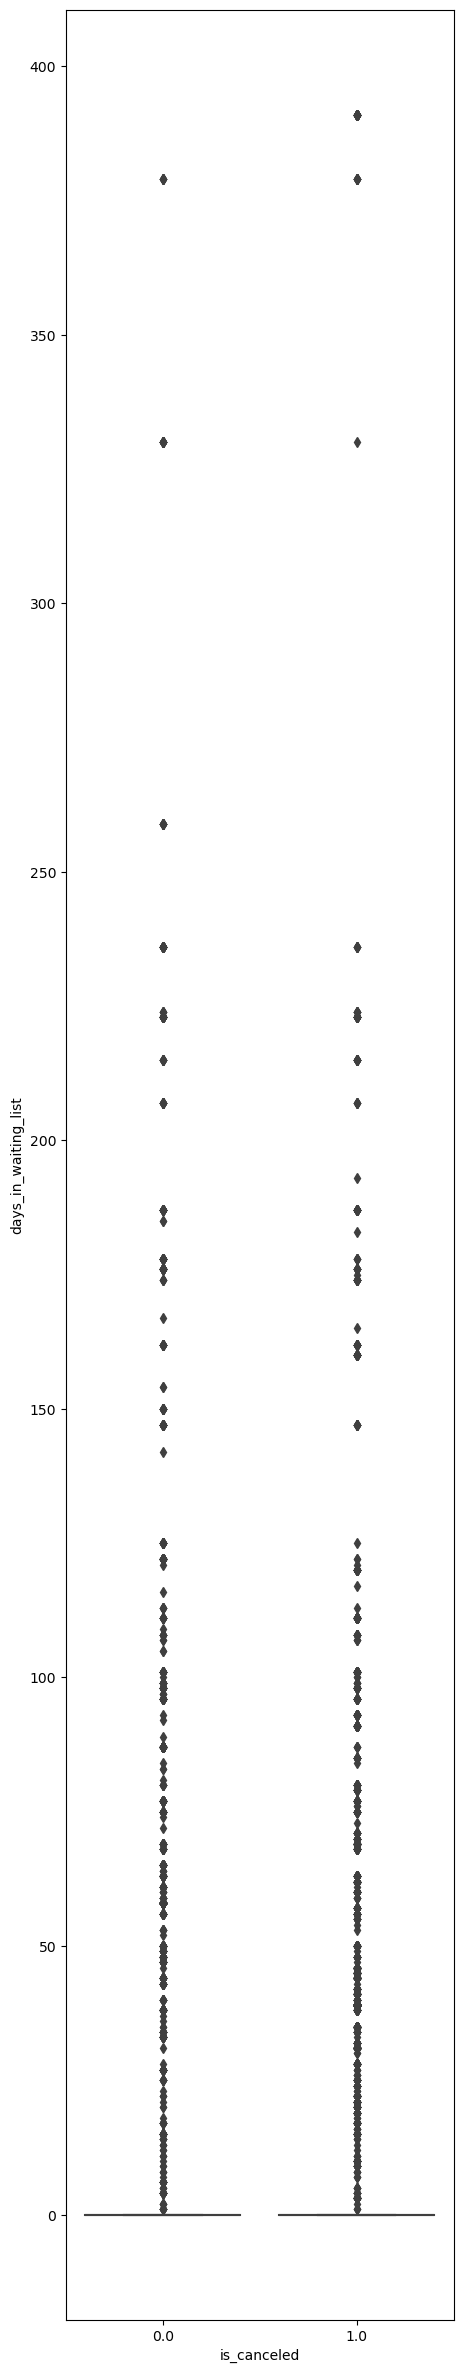

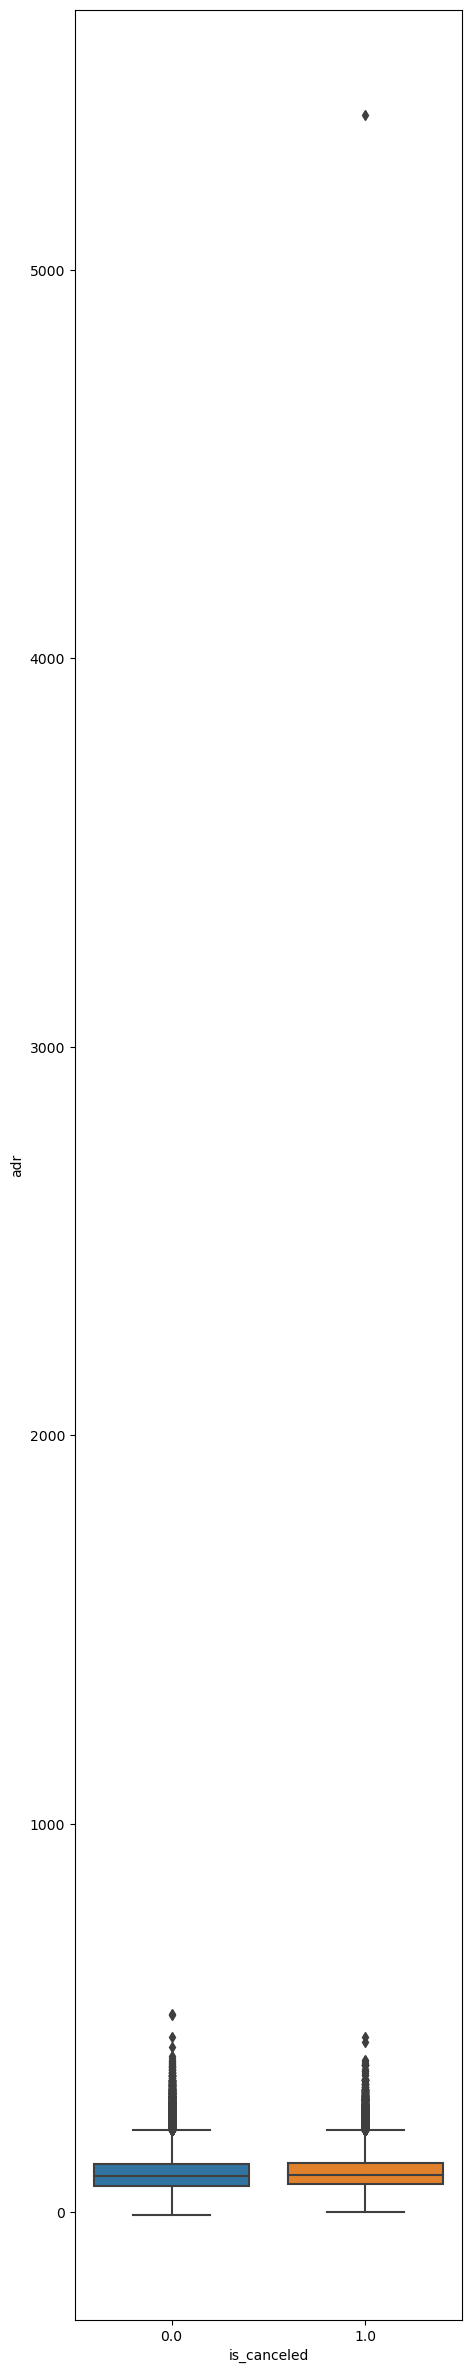

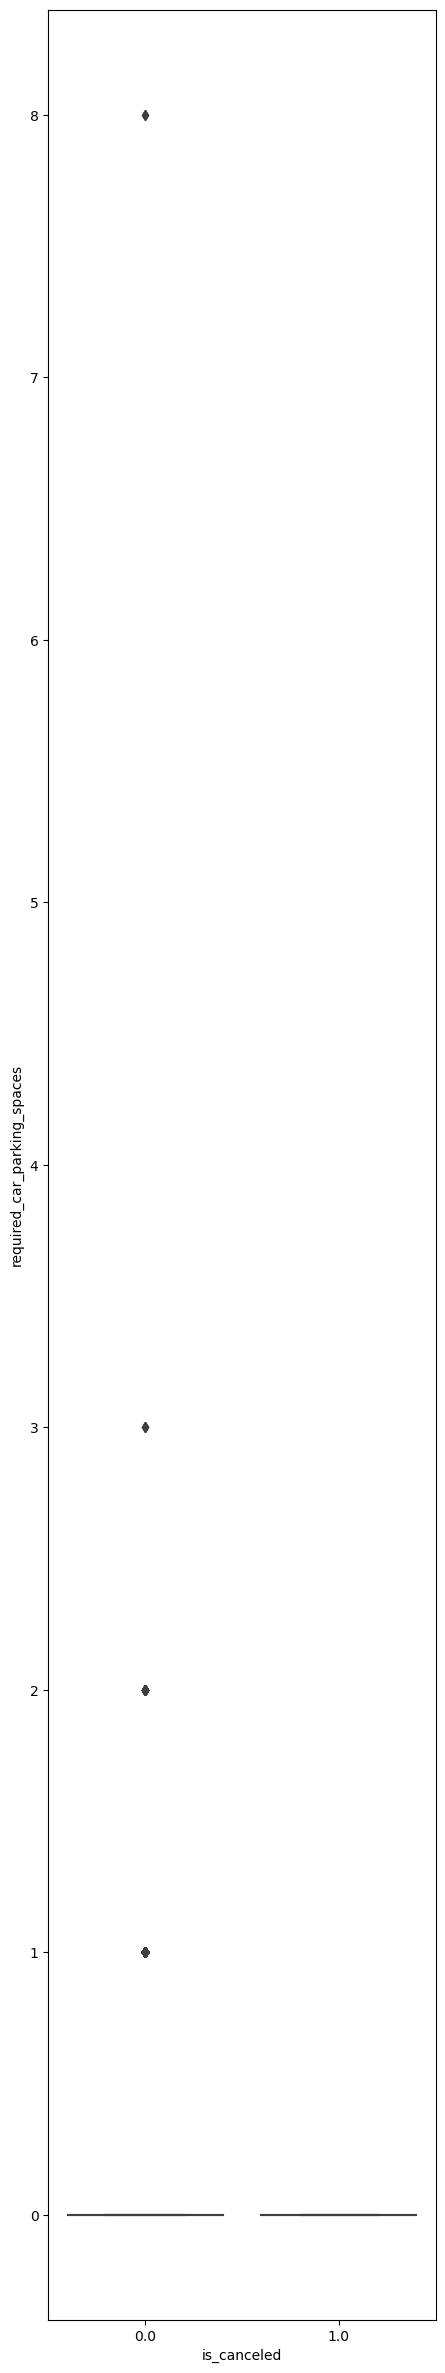

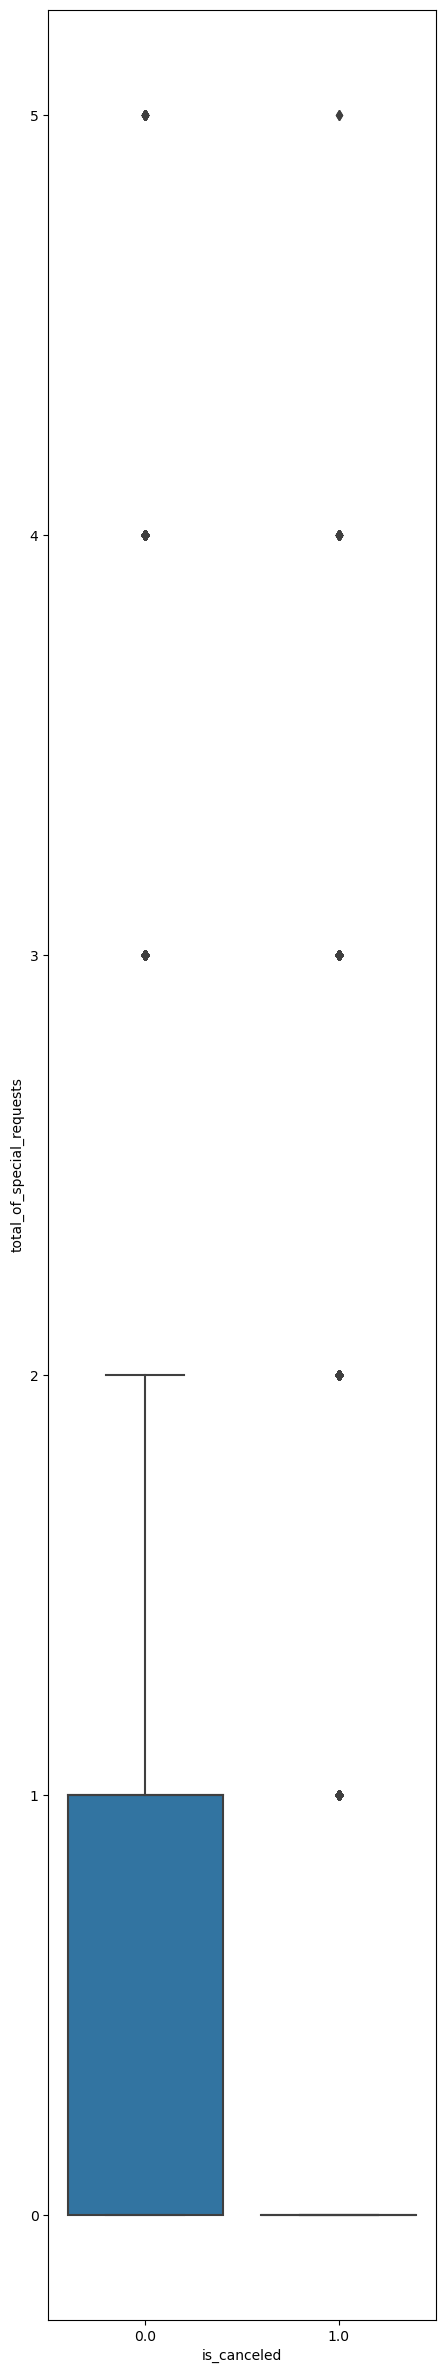

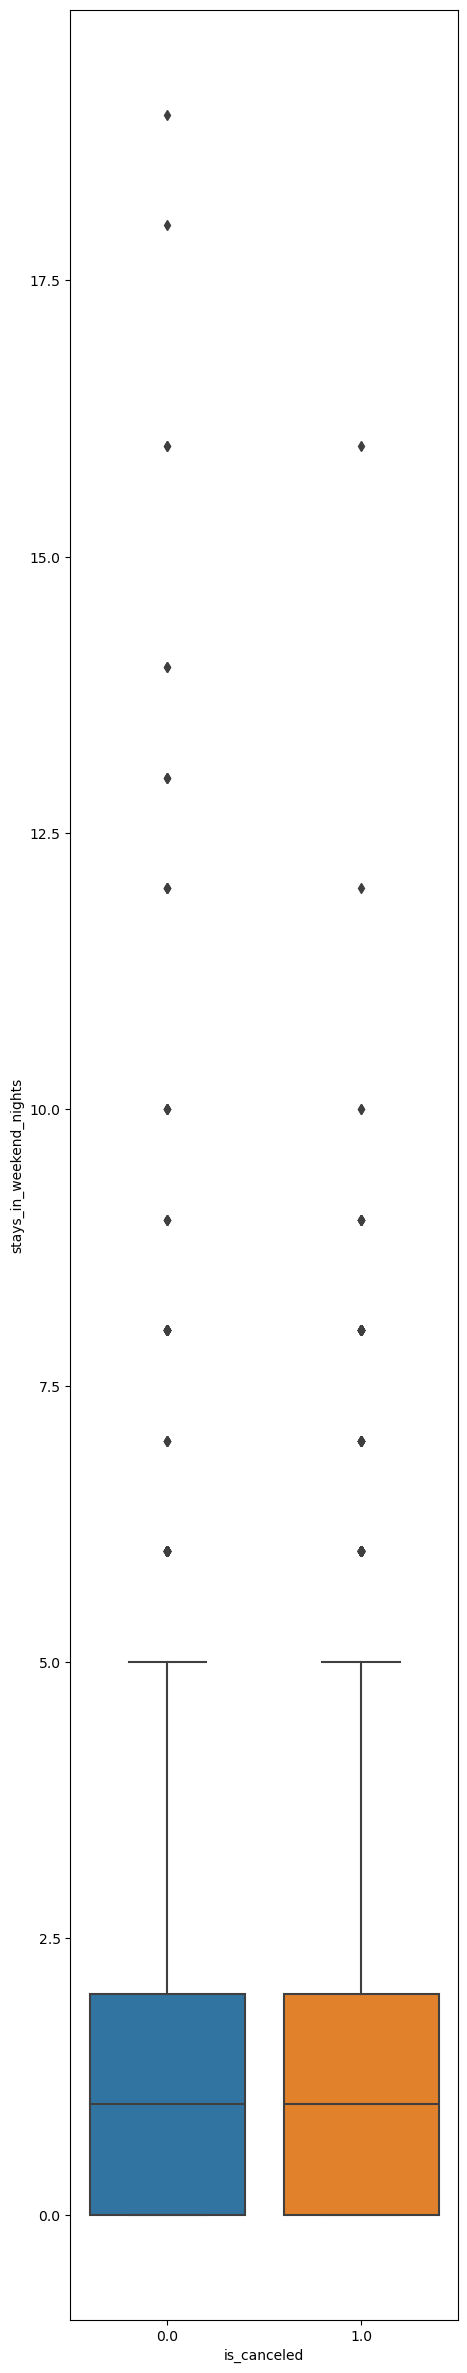

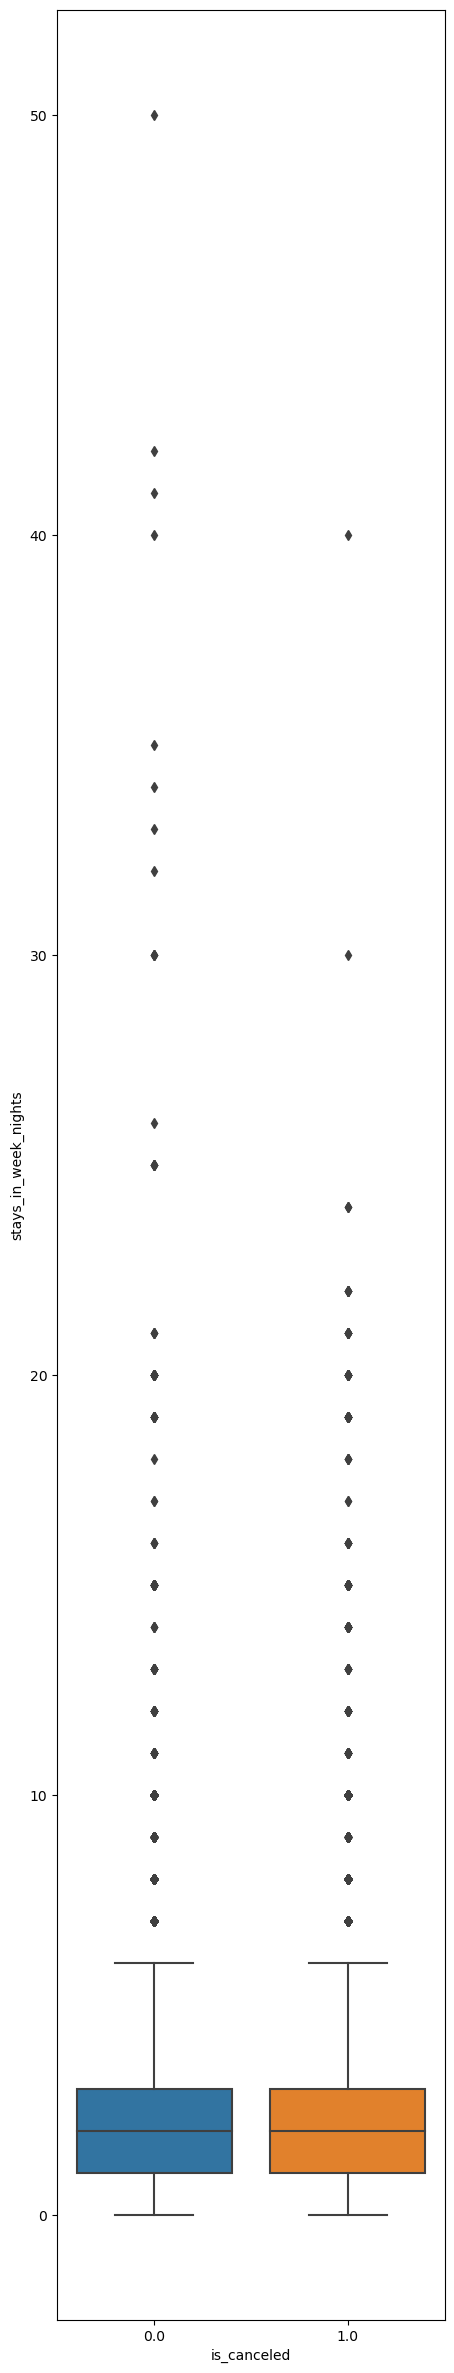

In [126]:
# Visualize the relationship between a specific categorical variable (the class variable in this case)
#   and all numerical variables.  (Violin plots work nicely too.)
for f in numerical_attribute_names:
    plt.figure(figsize=(5,30))
    sns.boxplot(x="is_canceled", y=f, data=data_df)

**Discussion:**

Like quartile box plot used above, I used to compare between cancellation ratio and numerical value. This will help to find the relationship between cancellation ratio and each of numberical value to check which attribute most likely affect the cancellation of the reservation.

**Adults**: If more adults are making reservation, there is more likelyhood that they will cancel the reservation. 

**Previous_cancelation**: If customer made previous cancellations more than 5 times, there is little likelyhood the customer will cancel the reservation.

**Previous_booking_not_canceled**: if customer did not made reservation cancellation more than 30 times, then, customer has possibility of not cancel the reservation for current booking.

**Required_parking_space**: According to the graph, if customer requires car parking space, there is likelyhood that customer will not cancel the reservation. However, this data has less trustworthy because parking request could be made after check-in.
Total_of_special_request: higher total_of_special_request, higher possibility that customer will not cancel the reservation.

Other columns have lesser relationship with the customer reservation cancellations status.

In [18]:
def anova_test(data_frame, categorical_variable, numerical_variable, alpha):
    # See: https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0
    # Calculate the f-value using the statsmodel module. 
    # You first build the model using the ols() function, and then call the fit() function on the instance of the model.
    # Finally, you call the anova_lm() function on the fitted model and specify the type of ANOVA test to perform on it:
    #   There are 3 types of ANOVA tests to perform, but their discussion is beyond the scope of this discussion.
    # Note: Hypothesis H0 = There is NO significant influence of the categorical variable on the numerical variable.
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    param_string = numerical_variable + " ~ " + categorical_variable
    model = ols(param_string, data=data_frame).fit()
    result = sm.stats.anova_lm(model, typ=2)
    #print(result)

    p_value = result.iat[0, 3]
    reject_h0 = (p_value < alpha)
    return p_value, reject_h0

In [19]:
# Compute ANOVA for the categorical attribute "species" and each numerical attribute.
# Note: Hypothesis H0 = There is NO significant influence of the categorical attribute on the numerical attribute.
alpha = 0.05  # Chosen by the data analyst, based on the business problem.
cat_att = "is_canceled"

print("   P_Value             Reject_H0        Cat_Attribute        Num_Attribute")
for num_att in numerical_attribute_names:
    p_value, reject_h0 = anova_test(data_df, cat_att, num_att, alpha)
    print("%10.6g  %20s %20s %20s" % (p_value, reject_h0, cat_att, num_att))

   P_Value             Reject_H0        Cat_Attribute        Num_Attribute
         0                  True          is_canceled            lead_time
4.71247e-94                  True          is_canceled               adults
 0.0808649                 False          is_canceled             children
2.93751e-29                  True          is_canceled               babies
8.66295e-319                  True          is_canceled previous_cancellations
1.50308e-87                  True          is_canceled previous_bookings_not_canceled
         0                  True          is_canceled      booking_changes
2.46253e-78                  True          is_canceled days_in_waiting_list
9.89719e-61                  True          is_canceled                  adr
         0                  True          is_canceled required_car_parking_spaces
         0                  True          is_canceled total_of_special_requests
  0.539679                 False          is_canceled stays_in_weeken

**Discussion:**

Like box plot graph above, ANOVA test compare categorical attribute "is_canceled" with each of the numberical attribute.
ANOVA test is making hypthesis H0: there is no influence of the categorical attribute on the numerical attribute. And in the table if relationship between attribute reject this hypothesis, we can say there is relationship between attributes.

Based on the Anova test, with Alpha chosen to be 0.05, there is a relationship between is_canceled and most of the numerical attributes.
   
However, number of children and stays_in_weeked_nights seem to have no relationship with the customer cancellation 

In order, previous_cancellations, adults, previous_booking_not_canceled, and days_in_waiting_list are the attributes that most reject the H0 hypothesis.

## **Numerical vs Numerical**

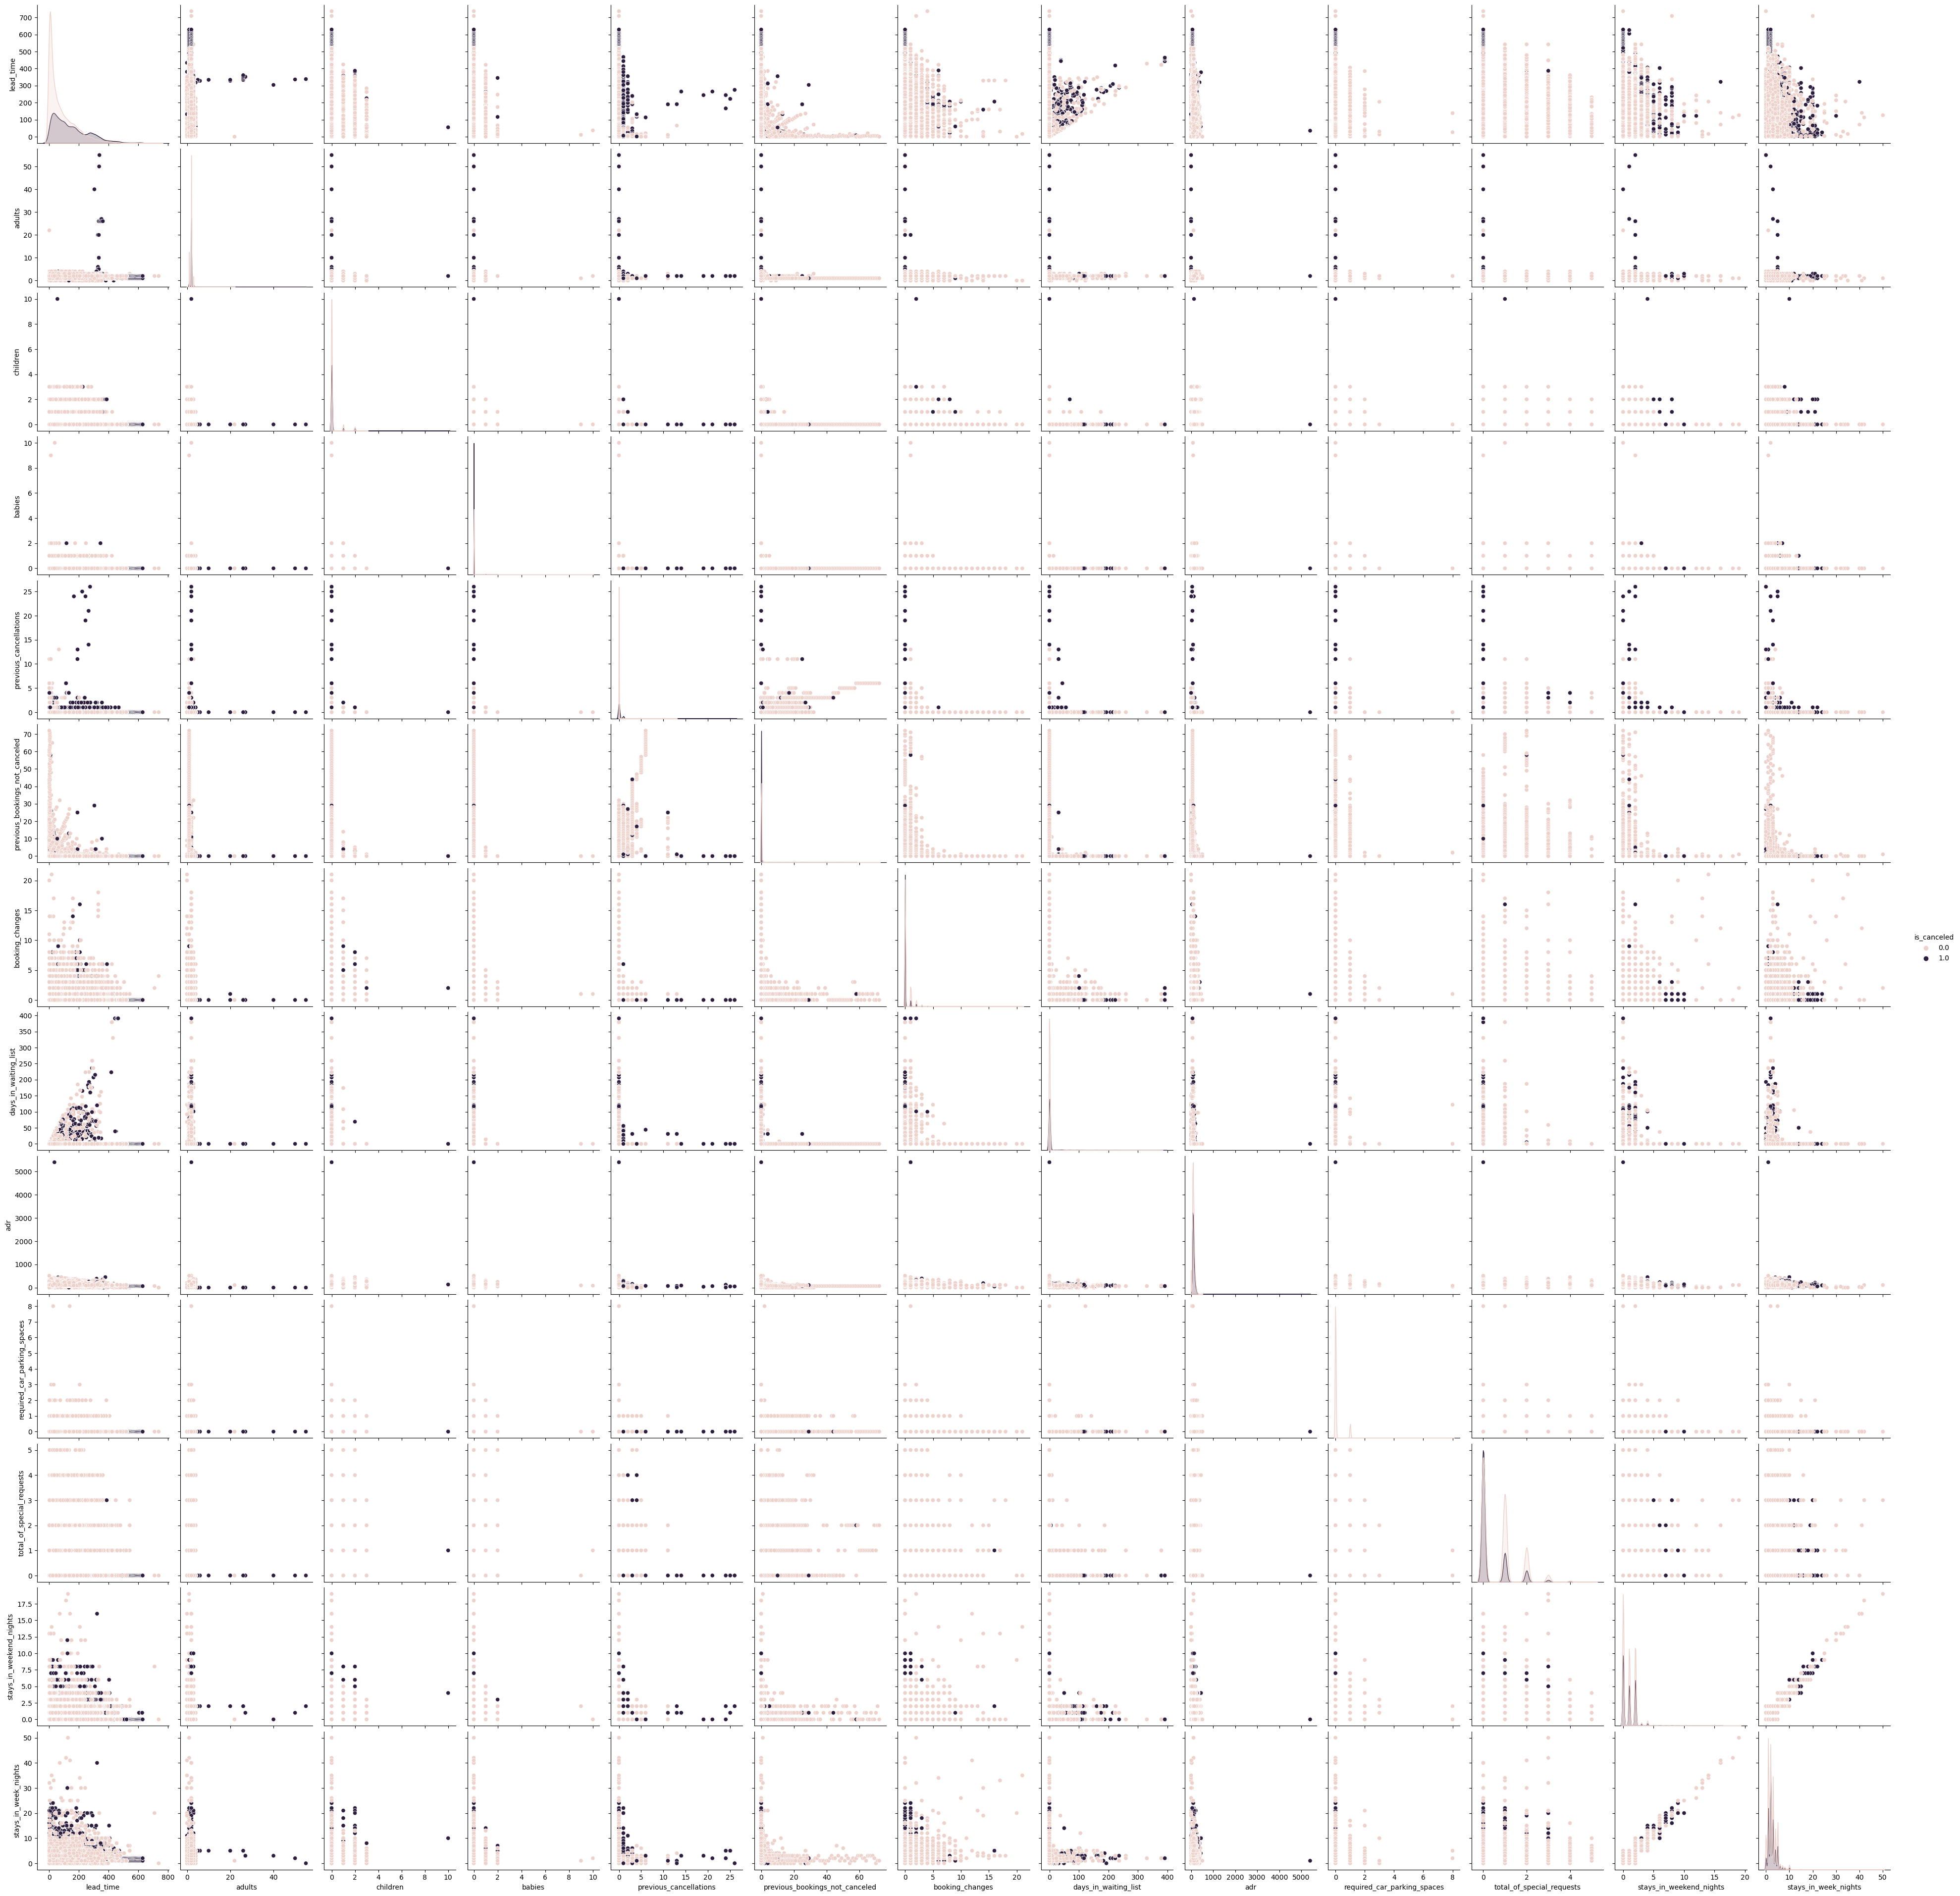

In [20]:
sns.pairplot(data = data_df[numerical_attribute_names+[class_attribute_name]], hue=class_attribute_name, height=3)
plt.show()

<AxesSubplot:>

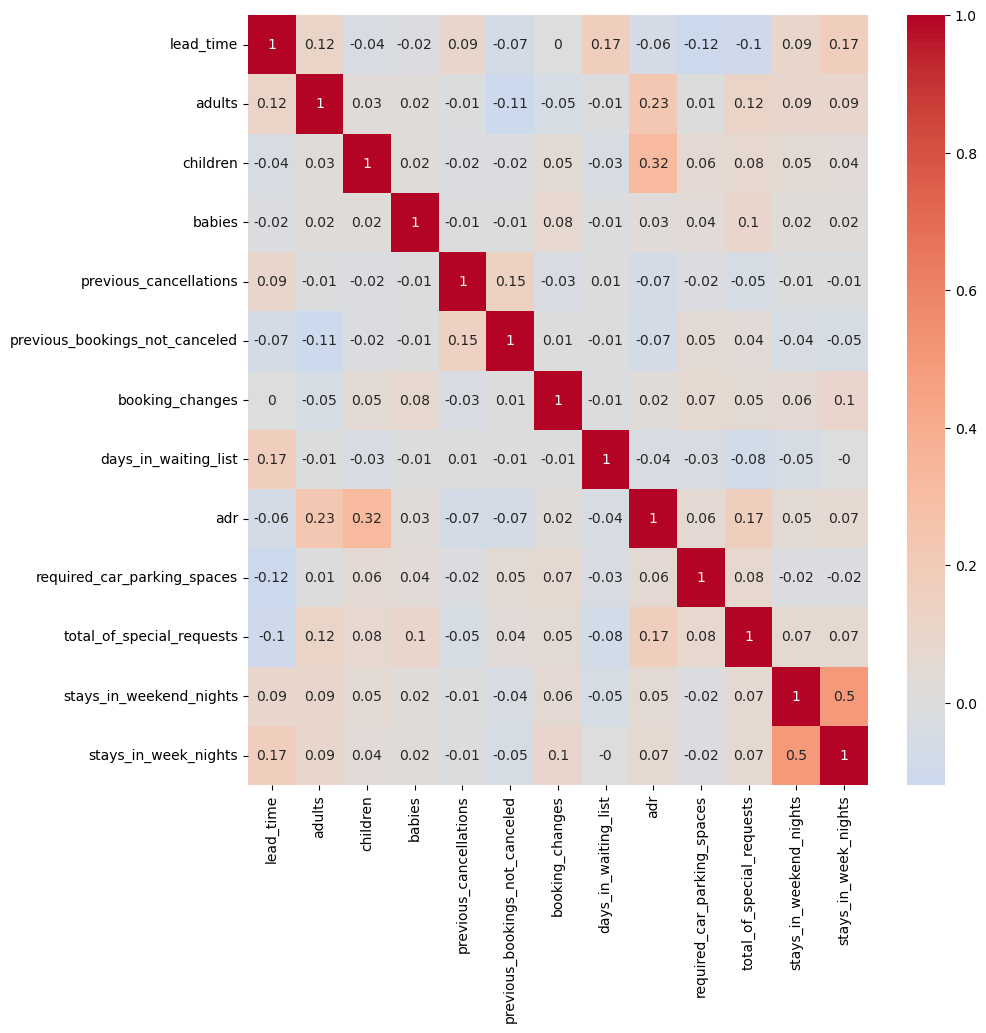

In [21]:
cor = data_df[numerical_attribute_names].corr(method='pearson').round(2)
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True, center=0.0, cmap='coolwarm')

<AxesSubplot:>

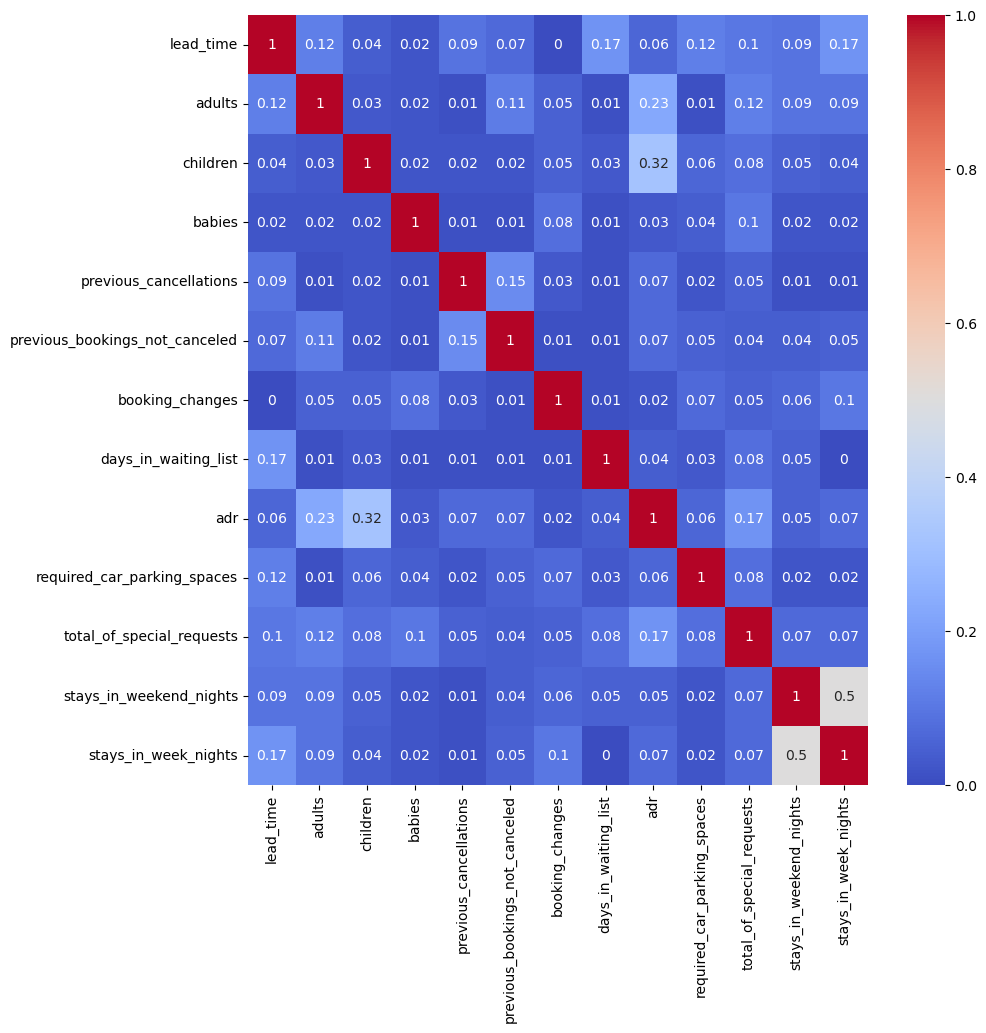

In [22]:
cor = abs(data_df[numerical_attribute_names].corr(method='pearson').round(2))
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True, center=0.5, cmap='coolwarm')

**Discussion**

In the **Pearson test**, it shows how linear relationship is existed between each of the numberical attribute. It means that if the value of chosen attribute increases, then values of other attribute also increase. If the number is close to the 1, it is clear linear relationship. If number of close to -1, it is opposite linear relationship. If the number is 0, there is no linear relationship. (It does not mean two attributes have no relationship. we can only assume there is no "linear" relationship. There might be other relationship.)

As as reuslt, we can know that there are some linear relationship among attributes. (However, not strong linear relationship)
   
Yet, there are still some attributes do not have linear relationship.
For example, leading times vs booking change have zero p-value.
days in waiting list vs stays in week nights


***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

**Discussion:**

Through comparing among the categorical attributes and numberical attributes to each other and is_cancelled, significant relationships are found. However, still some attributes have low affect on cancellation ratio. 

Therefore, from attributes that seems to be affecting the cancellation status, I will have further analysis on next section. 

***
# Section: 3 - Data Preparation
In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:
- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.

**NOTE:** In each of these sections, it is OK to decide to **not** make changes to the dataset, but you **must** explain **why** you made the choice.  Recall that the purpose of this step is to produce a clean dataset that is suitable for the intended purposes.  So, for example, you might choose to not remove any attributes, but if you have 100 apparently irrelevant attributes, explain why are you keeping them - there may be a good reason.
***

***
## Section: 3.1 - Clean the Data
- Implement any data cleaning steps previously identified.  Please justify.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

### **Filling NA Value**

In [170]:
# Create a copy of the dataset for cleaning
clean_data_df = data_df.copy()

In [171]:
clean_data_df['is_canceled'] = clean_data_df['is_canceled'].fillna(1)

**Discussion:**

For the empty is_canceled value, we cannot decide what value should be in directly.
However, using the reservation_status, we can assume that whether the customer canceled or check-out from the reservation

### **Duplicate Values**

In [172]:
clean_data_df.drop_duplicates(keep='first', inplace=True)  # This removes all but one copy of the records that are completely identical.
clean_data_df = clean_data_df.reset_index(drop=True)

**Discussion**

It has duplicate row 5. All the attributes have same value. So, delete one of the row

### **Typo Fix**

In [173]:
clean_data_df['market_segment'] = clean_data_df['market_segment'].replace(to_replace='Onlin TA', value='Online TA')

**Discussion:**

The market_segment has "Onlin TA" typo. It needs to be changed to "Online TA"

### **Check Data**

In [174]:
# Data before cleaning
data_df.describe()

ROW    is_canceled      lead_time  arrival_date_year  \
count  119391.000000  119390.000000  119391.000000      119391.000000   
mean    59694.000050       0.370408     104.010662        2016.156544   
std     34465.357245       0.482916     106.862967           0.707481   
min         0.000000       0.000000       0.000000        2015.000000   
25%     29846.500000       0.000000      18.000000        2016.000000   
50%     59694.000000       0.000000      69.000000        2016.000000   
75%     89541.500000       1.000000     160.000000        2017.000000   
max    119389.000000       1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119391.000000              119391.000000   
mean                  27.165172                  15.798117   
std                   13.605081                   8.780897   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119391.000000         119391.000000  119391.000000   
mean                  0.927591              2.500297       1.856572   
std                   0.998613              1.908278       0.582185   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119387.000000  119391.000000      119391.000000   
mean        0.103889       0.007949           0.031912   
std         0.398560       0.097436           0.175766   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119391.000000                   119391.000000   
mean                 0.087117                        0.137096   
std                  0.844333                        1.497431   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes         agent      company  days_in_waiting_list  \
count    119391.000000  103051.00000  6797.000000         119391.000000   
mean          0.221122      86.69487   189.266735              2.321130   
std           0.652303     110.77504   131.655015             17.594648   
min           0.000000       1.00000     6.000000              0.000000   
25%           0.000000       9.00000    62.000000              0.000000   
50%           0.000000      14.00000   179.000000              0.000000   
75%           0.000000     229.00000   270.000000              0.000000   
max          21.000000     535.00000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119391.000000                119391.000000              119391.000000  
mean      101.831089                     0.062517                   0.571366  
std        50.535580                     0.245290                   0.792796  
min        -6.380000                     0.000000          

In [175]:
# Data after cleaning
clean_data_df.describe()

ROW    is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000  119390.000000      119390.000000   
mean    59694.500000       0.370416     104.011416        2016.156554   
std     34465.068657       0.482918     106.863097           0.707476   
min         0.000000       0.000000       0.000000        2015.000000   
25%     29847.250000       0.000000      18.000000        2016.000000   
50%     59694.500000       0.000000      69.000000        2016.000000   
75%     89541.750000       1.000000     160.000000        2017.000000   
max    119389.000000       1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856571   
std                   0.998613              1.908286       0.582187   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000 

In [176]:
clean_data_df.head(15)

ROW         hotel  is_canceled  lead_time  arrival_date_year  \
0     0  Resort Hotel          0.0        342               2015   
1     1  Resort Hotel          0.0        737               2015   
2     2  Resort Hotel          0.0          7               2015   
3     3  Resort Hotel          0.0         13               2015   
4     4  Resort Hotel          0.0         14               2015   
5     5  Resort Hotel          0.0         14               2015   
6     6  Resort Hotel          0.0          0               2015   
7     7  Resort Hotel          0.0          9               2015   
8     8  Resort Hotel          1.0         85               2015   
9     9  Resort Hotel          1.0         75               2015   
10   10  Resort Hotel          1.0         23               2015   
11   11  Resort Hotel          0.0         35               2015   
12   12  Resort Hotel          0.0         68               2015   
13   13  Resort Hotel          0.0         18               2015   
14   14  Resort Hotel          0.0         37               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                July                        27                          1   
1                July                        27                          1   
2                July                        27                          1   
3                July                        27                          1   
4                July                        27                          1   
5                July                        27                          1   
6                July                        27                          1   
7                July                        27                          1   
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
11               July                        27                          1   
12               July                        27                          1   
13               July                        27                          1   
14               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                         0                     0       2       0.0       0   
1                         0                     0       2       0.0       0   
2                         0                     1       1       0.0       0   
3                         0                     1       1       0.0       0   
4                         0                     2       2       0.0       0   
5                         0                     2       2       0.0       0   
6                         0                     2       2       0.0       0   
7                         0                     2       2       0.0       0   
8                         0                     3       2       0.0       0   
9                         0                     3       2       0.0       0   
10                        0                     4       2       0.0       0   
11                        0                     4       2       0.0       0   
12                        0                     4       2       0.0       0   
13                        0                     4       2       1.0       0   
14                        0                     4       2       0.0       0   

   meal country market_segment distribution_channel  is_repeated_guest  \
0    BB     PRT         Direct               Direct                  0   
1    BB     PRT         Direct               Direct                  0   
2    BB     GBR         Direct               Direct                  0   
3    BB     GBR      Corporate            Corporate                  0   
4    BB     GBR      Online TA 

In [177]:
# Get the duplicate records across all attributes.
dup_df = clean_data_df[clean_data_df.duplicated()]
num_dup_records = dup_df.shape[0]
print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

Number of duplicate records across all attributes: 0


Empty DataFrame
Columns: [ROW, hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

**Discussion**

As a result, now we can see that total number of **is_canceled** is matched with other attributes.

Moreover, as we delete the duplicate value, new total number is set.

In [178]:
# Count the missing values for the entire dataframe.
na_df = clean_data_df[clean_data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()

print("Total Records:", data_df.shape[0], "- Number of Records with NA:", num_records_with_na, "- Number of NA Values:", num_na_values)
na_df.head(10)

# Show the missing values for each attribute.
print("NA Values per Attribute:")
for att in all_attribute_names:
    num_na = na_df[att].isna().sum()
    if num_na > 0:
        print(att,na_df[att].isna().sum())

Total Records: 119391 - Number of Records with NA: 119173 - Number of NA Values: 129425
NA Values per Attribute:
children 4
country 488
agent 16340
company 112593


In [179]:
# Get the unique values for the categorical attributes.
print("Total Records:", clean_data_df.shape[0], "- Value Counts per Categorical Attribute:\n")
for att in categorical_attribute_names:
    print(clean_data_df[att].value_counts(normalize = False, sort = True, ascending = False, bins = None, dropna = False))
    print("\n")

Total Records: 119390 - Value Counts per Categorical Attribute:

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64


Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64


TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64


A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64


A    74053
D    25322
E     7806
F     3751
G

**Discussion**

As discussed abouve, **is_canceled** value is replace with specific reservation_status. 

***
## Section: 3.2 - Select Attributes
- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.
***

**Discussion:**

Among many numerical attributes, box plot graph, ANNOVA test, pearson, chi2 square shows that these are the attributes that affect the cancelation ratio significantly.
Espeically, these attributes have lower p-value than other attributes, which we can assume they reject more on hypothesis that the chosen attribute has no significant influence on is_canceled.

**Adults**

**Previous_cancelation**

**Previous_booking_not_canceled**

**Booking_changes**

I explained the details about attribute in section 2.5 Categorical vs. Numerical 

<AxesSubplot:xlabel='is_canceled', ylabel='adults'>

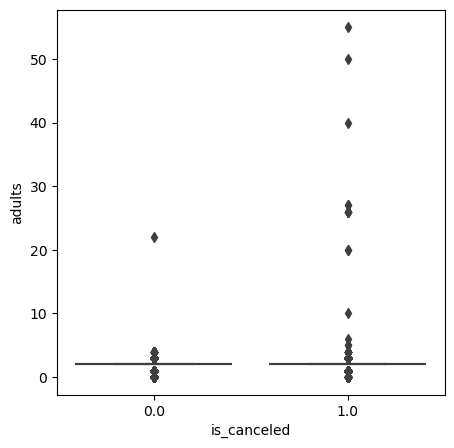

In [180]:
plt.figure(figsize=(5,5))
sns.boxplot(x="is_canceled", y="adults", data=clean_data_df)

<AxesSubplot:xlabel='is_canceled', ylabel='previous_cancellations'>

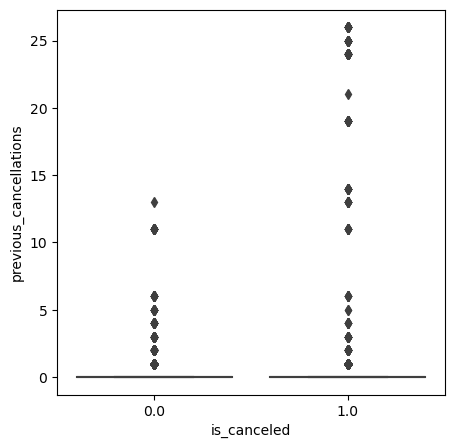

In [181]:
plt.figure(figsize=(5,5))
sns.boxplot(x="is_canceled", y="previous_cancellations", data=clean_data_df)

<AxesSubplot:xlabel='is_canceled', ylabel='previous_bookings_not_canceled'>

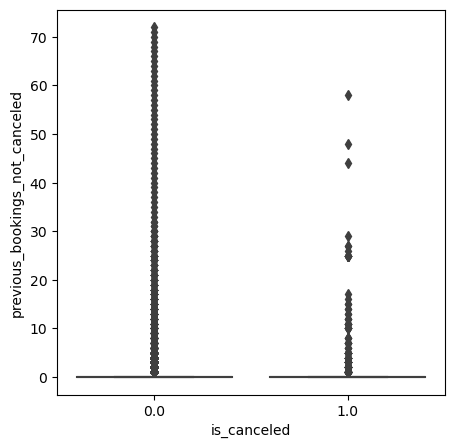

In [182]:
plt.figure(figsize=(5,5))
sns.boxplot(x="is_canceled", y="previous_bookings_not_canceled", data=clean_data_df)

<AxesSubplot:xlabel='is_canceled', ylabel='booking_changes'>

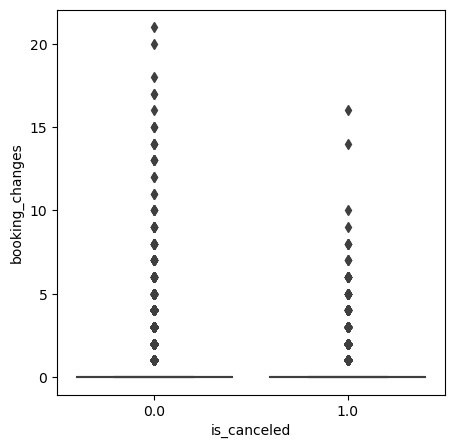

In [183]:
plt.figure(figsize=(5,5))
sns.boxplot(x="is_canceled", y="booking_changes", data=clean_data_df)

**Discussion**

As I discussed above about how they are impacting the cancelation ratio, we can abstract the attributes that is the most importatnt elements to lower the cancelation ratio.

**Adults**: If more adults are making reservation, there is more likelyhood that they will cancel the reservation. 

**Previous_cancelation**: If customer made previous cancellations more than 5 times, there is little likelyhood the customer will cancel the reservation.

**Previous_booking_not_canceled**: if customer did not made reservation cancellation more than 30 times, then, customer has possibility of not cancel the reservation for current booking.

**Booking_changes**: If customer is constantly making changes on reservation more than 10 times, there is little likelyhood that cusomter will not cancel the reservation

In [184]:
# clean_data_df.drop('is_canceled', axis=1, inplace=True)
clean_data_df.drop('arrival_date_year', axis=1, inplace=True)
clean_data_df.drop('arrival_date_week_number', axis=1, inplace=True)
clean_data_df.drop('arrival_date_day_of_month', axis=1, inplace=True)
clean_data_df.drop('stays_in_week_nights', axis=1, inplace=True)
clean_data_df.drop('lead_time', axis=1, inplace=True)
# clean_data_df.drop('babies', axis=1, inplace=True)
# clean_data_df.drop('children', axis=1, inplace=True)

clean_data_df.drop('is_repeated_guest', axis=1, inplace=True)
clean_data_df.drop('agent', axis=1, inplace=True)
clean_data_df.drop('company', axis=1, inplace=True)
clean_data_df.drop('days_in_waiting_list', axis=1, inplace=True)
clean_data_df.drop('stays_in_weekend_nights', axis=1, inplace=True)
clean_data_df.drop('adr', axis=1, inplace=True)
clean_data_df.drop('required_car_parking_spaces', axis=1, inplace=True)
clean_data_df.drop('total_of_special_requests', axis=1, inplace=True)

In [185]:
clean_data_df.describe()

ROW    is_canceled         adults       children  \
count  119390.000000  119390.000000  119390.000000  119386.000000   
mean    59694.500000       0.370416       1.856571       0.103890   
std     34465.068657       0.482918       0.582187       0.398561   
min         0.000000       0.000000       0.000000       0.000000   
25%     29847.250000       0.000000       2.000000       0.000000   
50%     59694.500000       0.000000       2.000000       0.000000   
75%     89541.750000       1.000000       2.000000       0.000000   
max    119389.000000       1.000000      55.000000      10.000000   

              babies  previous_cancellations  previous_bookings_not_canceled  \
count  119390.000000           119390.000000                   119390.000000   
mean        0.007949                0.087118                        0.137097   
std         0.097436                0.844336                        1.497437   
min         0.000000                0.000000                        0.000000   
25%         0.000000                0.000000                        0.000000   
50%         0.000000                0.000000                        0.000000   
75%         0.000000                0.000000                        0.000000   
max        10.000000               26.000000                       72.000000   

       booking_changes  
count    119390.000000  
mean          0.221124  
std           0.652306  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max          21.000000

**Discussion**

As we teardown the some attribute and put some more essential data, we can see the detail about each attributes more easily. At first with the simple numbers, max number of attributes seems to be outlier. However, using the box plot graph, it is shown that they are not outlier that is too far away from the range.

I left the children and babies attribute for section 3.3 purpose.

***
## Section: 3.3 - Create Attributes
- Optionally, create new attributes based on the values of other attibutes.
- Which new attributes did you decide to create, if any? Please justify.
***

**Discussion:**

From analysis above, we figure out that the number of adults are affecting the cancellation ratio. more adults mean there is likelyhood that they will cancel the reservation. However, it seems like children and babies are not affecting significantly on cancellation. So, by adding the all the attributes of adults, children, and babies to find the total number of people for each row to check total number also affect the reservation cancellations.

special notes that children has NA value which I discussed above why I cannot just put mean values or zero. It causes some noise on the result which is shown below. Thus, Count is not 119390. To validate this additional attribute we need more information about how to fill in children NA values.

In [186]:
clean_data_df['total_people'] = clean_data_df['adults'] + clean_data_df['children'] + clean_data_df['babies']

In [187]:
clean_data_df['total_people'].describe()

count    119386.000000
mean          1.968397
std           0.724723
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: total_people, dtype: float64

**Discusstion**

It is unusal that minimum value of total people is zero. By having zero, it means there is at least one row that all the adults, children, and babies are zero. Thus, I looked through the meta data and found that there are few rows with all zero values for adults, children, and babies. This might be mistake when entering data or entered into the system by purpose. We have to investigate the issue further.

<AxesSubplot:xlabel='is_canceled', ylabel='total_people'>

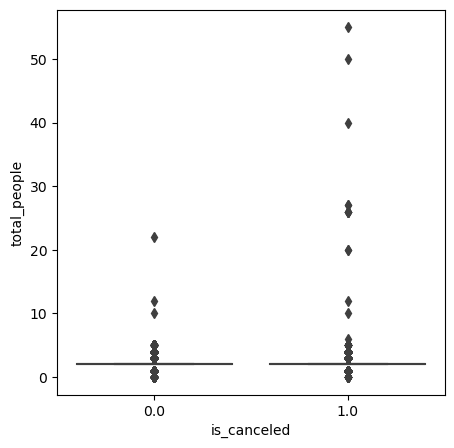

In [188]:
plt.figure(figsize=(5,5))
sns.boxplot(x="is_canceled", y="total_people", data=clean_data_df)

**Discussion**

Using the same box plot graph above, since number of adults affects the cancelation ratio, it shows that total number of people on reservation also affect the cancelation ratio. 

***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

In [190]:
# Z-Score using pandas (could also use SciKitLearn StandardScaler, stats.zscore, etc.)
clean_data_df['total_people'] = \
    (clean_data_df['total_people'] - clean_data_df['total_people'].mean()) \
    / clean_data_df['total_people'].std()

In [191]:
clean_data_df.describe()

ROW    is_canceled         adults       children  \
count  119390.000000  119390.000000  119390.000000  119386.000000   
mean    59694.500000       0.370416       1.856571       0.103890   
std     34465.068657       0.482918       0.582187       0.398561   
min         0.000000       0.000000       0.000000       0.000000   
25%     29847.250000       0.000000       2.000000       0.000000   
50%     59694.500000       0.000000       2.000000       0.000000   
75%     89541.750000       1.000000       2.000000       0.000000   
max    119389.000000       1.000000      55.000000      10.000000   

              babies  previous_cancellations  previous_bookings_not_canceled  \
count  119390.000000           119390.000000                   119390.000000   
mean        0.007949                0.087118                        0.137097   
std         0.097436                0.844336                        1.497437   
min         0.000000                0.000000                        0.000000   
25%         0.000000                0.000000                        0.000000   
50%         0.000000                0.000000                        0.000000   
75%         0.000000                0.000000                        0.000000   
max        10.000000               26.000000                       72.000000   

       booking_changes  total_people  
count    119390.000000  1.193860e+05  
mean          0.221124  3.766539e-14  
std           0.652306  1.000000e+00  
min           0.000000 -2.716068e+00  
25%           0.000000  4.360753e-02  
50%           0.000000  4.360753e-02  
75%           0.000000  4.360753e-02  
max          21.000000  7.317502e+01

**Discussion:**

Z-score is using the standard deviation to find the how far does the value is spread out from the mean of the value. I used the Z-score in total people and we could see the value that how each value is below or higher than mean.

Since mean of z-score toatl people is higher than 0, most of values are slightly higher total number than mean.

***
## Section: 3.5 - Select Records
- Optionally, select a subset of the records, via sampling, etc., to decrease the size of the dataset. Please justify.
***

**Discussion:**

In this data, there is no need to trim down that data because there is a large spread of data which trim down the data would cause to produce different result. Furthermore, in this data, there are a lots of values that need to know more information to handle more effectively. For example, too many number of duplicate values, NA value for children, and zero total number of people are values that need more validation. 

***
## Section: 3.6 - Other Data Preparation
- Optionally, perform other preparation steps (e.g., to optimize storage, retrieval, etc.). Please justify.
***

**Discussion:**

Because the data given has own attributes that have own meaning, in this homework, optimization of storage is not needed except handling duplicate values or wrong values that are discussed above.

***
# Section: 4 - Modeling
In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:
- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.
***

**Discussion:**

Fill in...

***
# Section: 5 - Evaluation
In this step, the analyses and/or models are evaluated for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.
***

**Discussion:**

Fill in...

***
# Section: 6 - Deployment
In this step, data and resulting models and/or analyses are put to use. This may include:
- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.
***

**Discussion:**

Fill in...

***
# Section: Conclusions
- What did you learn from this exercise?
***

**Discussion:**

Through homework, I learned a number of ways to handle the data to see how each attribute interact with the class attribute the derive the reuslt. 